## INTRODUCTION

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.



## OBJECTIVES

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

## Data Cleaning and Manipulation

In [3]:
#fixing the DataFrame option

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)
pd.set_option('max_info_columns', 200)

In [4]:
#importing the data files 

application_df = pd.read_csv('application_data.csv')
prevapplication_df = pd.read_csv('previous_application.csv')

In [5]:
#Dataframes Dimensions

print('application_df:', application_df.shape)
print('prevapplication_df:', prevapplication_df.shape)

application_df: (307511, 122)
prevapplication_df: (1670214, 37)


In [6]:
#cheking the top values of application data
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

* Here we can see there are lots of null values in the database

In [7]:
# Inspecting the application dataframe 

application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

* Here we can see above there are lots of columns where we have lots of null values available 

### Checking the Null Values

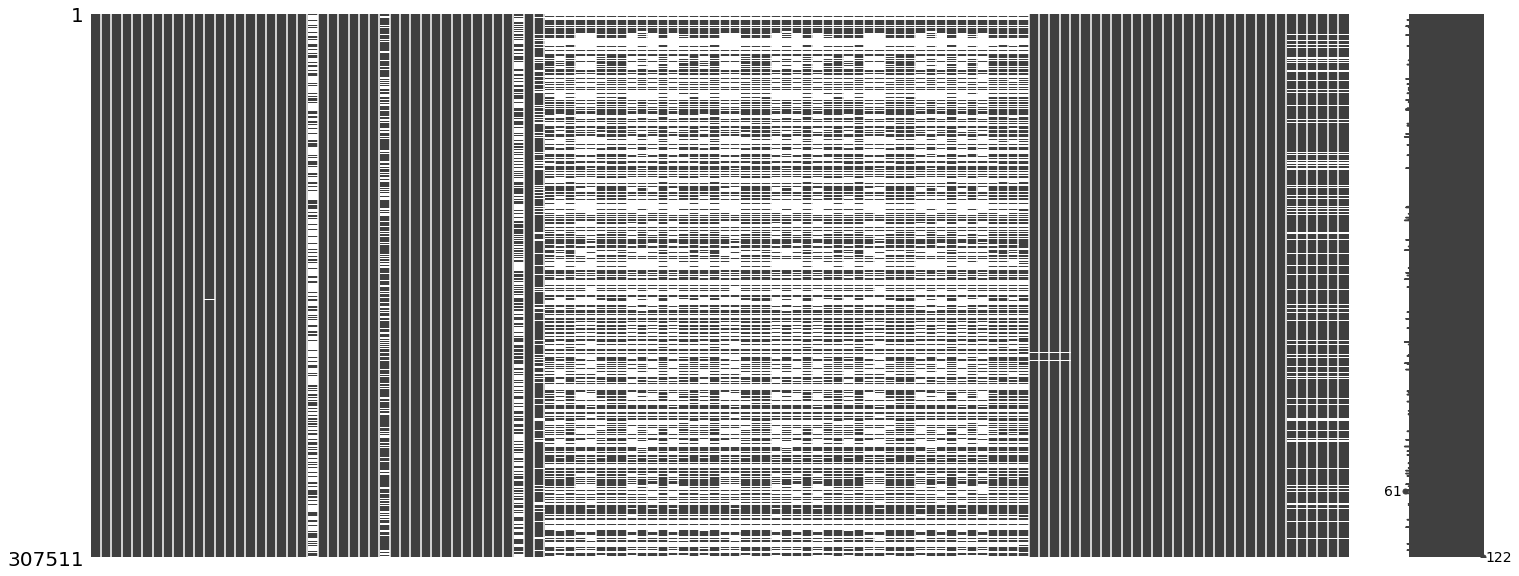

In [8]:
#checking the Missing values

import missingno as mn
mn.matrix(application_df)
plt.show()

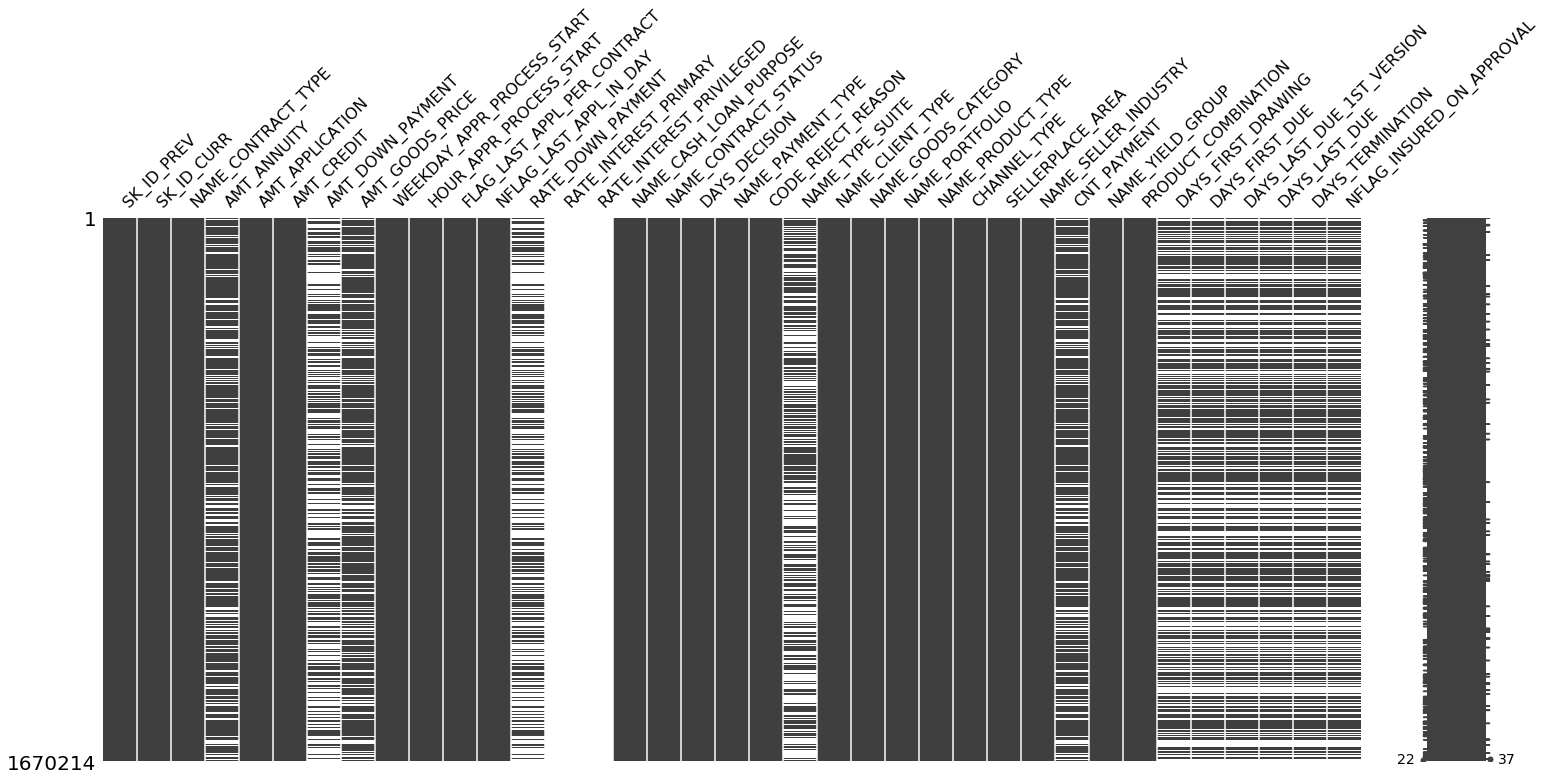

In [9]:
#checking the Missing values


mn.matrix(prevapplication_df)
plt.show()

#### Insight

* This will give us a rough view of Null values presented in our datasets

In [10]:
#finding the percentage of null values in application data

missing_application_df =round((application_df.isna().sum()/application_df.shape[0])*100,2)
missing_application_df = missing_application_df.reset_index()
missing_application_df =missing_application_df.rename(columns={'index':'Column', 0:'Value'})

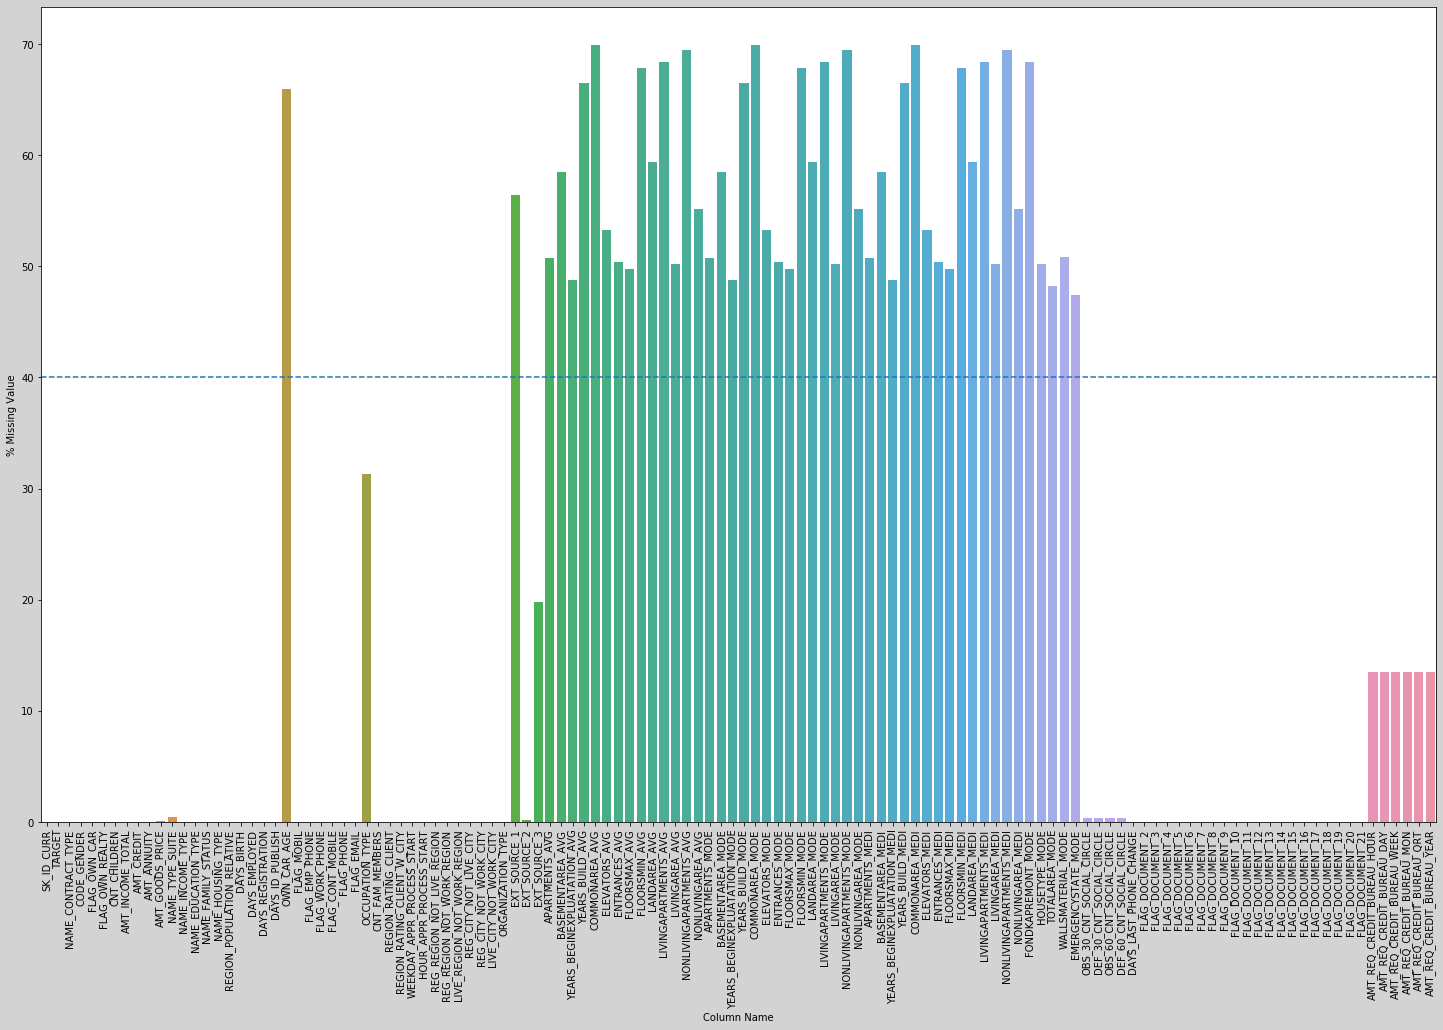

In [11]:
#plotting the columns having the null values and putting a threshold =40%

fig = plt.figure(figsize=[25,15])
sns.barplot(missing_application_df['Column'], missing_application_df['Value'],  data=missing_application_df)
plt.xlabel('Column Name')
plt.ylabel('% Missing Value')
plt.xticks(rotation = 90)
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.axhline(40, ls = '--')
plt.show()

In [12]:
#columns name having more than 40% values as Null in application data
col_null_application_40 = missing_application_df[missing_application_df['Value']>=40]
col_null_application_40.reset_index(inplace = True, drop = True)
col_null_application_40

,Column,Value
0,OWN_CAR_AGE,65.99
1,EXT_SOURCE_1,56.38
2,APARTMENTS_AVG,50.75
3,BASEMENTAREA_AVG,58.52
4,YEARS_BEGINEXPLUATATION_AVG,48.78
5,YEARS_BUILD_AVG,66.50
6,COMMONAREA_AVG,69.87
7,ELEVATORS_AVG,53.30
8,ENTRANCES_AVG,50.35
9,FLOORSMAX_AVG,49.76


In [13]:
# list of the columns Name in the Application data which have more than 40% values as Null

col1 = col_null_application_40['Column'].tolist()

* According to the Industry scenario columns having more than 40% values as null are good drop off

#### Removing the Unneccessary Columns from Dataset



In [14]:
# dropping the uneccessary columns from the application dataframe

filter_application_df = application_df.drop(labels=col1, axis = 1)

In [15]:
#checking the application_data after removing unwanted columns 
filter_application_df.shape

(307511, 73)

In [16]:
filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


* There are some columns like "WEEKDAY_APPR_PROCESS_START" and "HOUR_APPR_PROCESS_START", which states that day of the week and hour of the day did the client apply for previous application respectively. These columns are redundant and can be drop from the scope of study

In [17]:
redun_col =  ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']


filter_application_df.drop(labels=redun_col, axis=1, inplace=True)
filter_application_df.shape

(307511, 71)

#### Explore the data more to find such more columns which can be dropped or which are useless in order to find the defaulter

In [18]:
# exploring dataset
filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#checking the Null values in columns
filter_application_df.isna().sum().sort_values(axis=0, ascending = False )

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
T

In [20]:
#Checking Occupation_Type Column 
filter_application_df['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

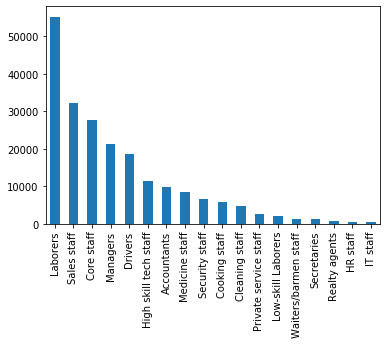

In [21]:
# Bar plot of OCCUPATION_TYPE

filter_application_df['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.show()

In [22]:
#% of null values in this columns
96391/307511

0.31345545362604915

* We usually follow to replace the Null value of categorical variable with the Mode Value 
* Here if we replace the Null value which is around ~96k with the Mode i.e. 'Laboreres' here which itself is around ~55k would not make sense 
* Replacing the NULL value with mode in this case will over shadow the actual picture of 'Laborers' class
* We cannot even drop this colums as it is one of the crucial Column and we cannot even remove these NAN row because by removing these rows would also remove crucial data points from other columns
* In order to cater these NAN values we can replace them by 'Undisclosed' Occupational Type and will consider them among those people who have not disclosed there OCCUPATION_TYPE

In [23]:
#replacing NAN values in OCCUPATION_TYPE by 'Undisclosed' type
filter_application_df['OCCUPATION_TYPE'] = filter_application_df['OCCUPATION_TYPE'].fillna('Undisclosed')


In [24]:
#Checking the null values in OCCUPATION_TYPE Column and distribution of data also
print('Total null values in OCCUPATION_TYPE column:', filter_application_df['OCCUPATION_TYPE'].isna().sum())

filter_application_df['OCCUPATION_TYPE'].value_counts()


Total null values in OCCUPATION_TYPE column: 0


Undisclosed              96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

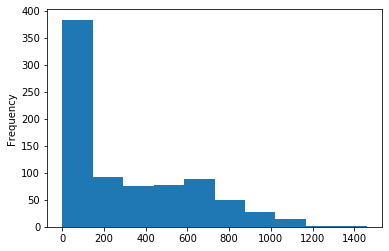

In [25]:
#Checking EXT_Source3 Column 

filter_application_df['EXT_SOURCE_3'].value_counts().plot.hist()
plt.show()

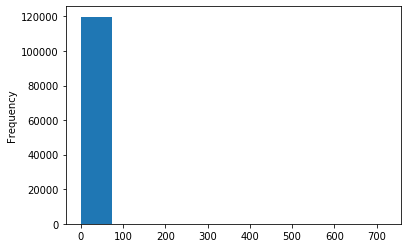

In [26]:
#Checking EXT_Source2 Column

filter_application_df['EXT_SOURCE_2'].value_counts().plot.hist()
plt.show()

* We can check if these two EXT_Source3 and EXT_source2 does have any linear relation with our TARGET Varible
* According to the Metadeta, there EXT_SourceX is "Normalized score from external data source"
* And we have already drop one such column named 'EXT_Source1' having more than 50% values as null

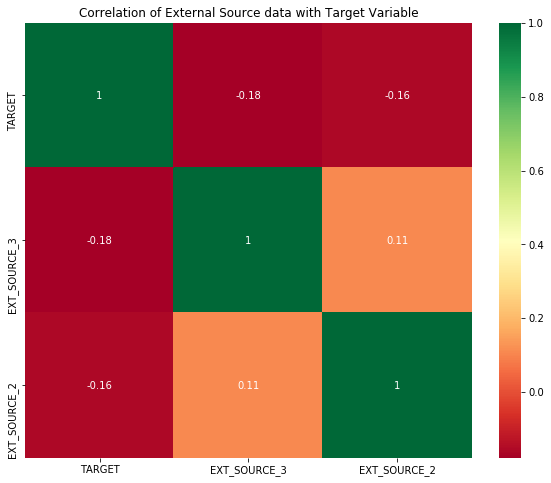

In [27]:
# Correlation between EXT_source3 and EXT_source2 with Target Variable
plt.figure(figsize=[10,8])
sns.heatmap(filter_application_df[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2']].corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation of External Source data with Target Variable')
plt.show()

* Here we cannot be able to see any strong correlation between the Target Variable and 'Ext_source_X' columns 
* Means, there is no linear relationship between clients with paying difficulties/ No difficulties with the Normalized score from the external score
* Thus we are good to drop these columns from our further study

In [28]:
#dropping 'EXT_SOURCE_3' and 'EXT_SOURCE_2' columns from our filtered application data

filter_application_df = filter_application_df.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2'], axis=1)
filter_application_df.shape

(307511, 69)

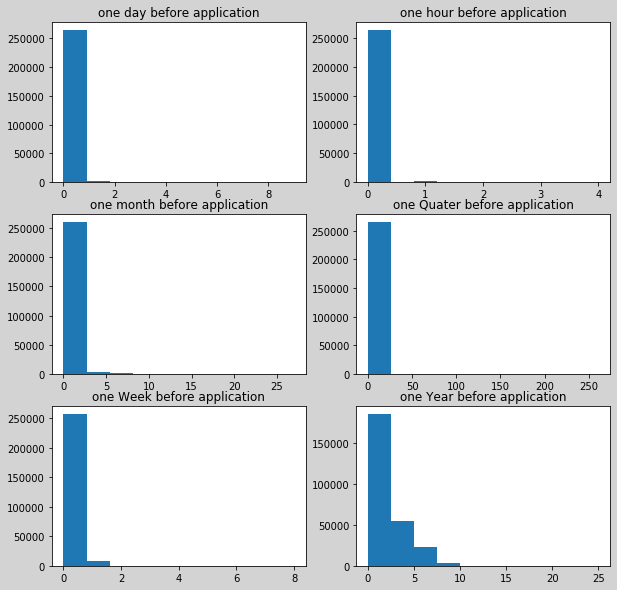

In [29]:
# Checking the Number of enquiry to credit bureau about the clients(one hour, one day, one month before loan application..)

fig, a = plt.subplots(3,2, figsize=[10,10])

a[0][0].hist(filter_application_df['AMT_REQ_CREDIT_BUREAU_DAY'])
a[0][0].set_title('one day before application')
a[0][1].hist(filter_application_df['AMT_REQ_CREDIT_BUREAU_HOUR'])
a[0][1].set_title('one hour before application')
a[1][0].hist(filter_application_df['AMT_REQ_CREDIT_BUREAU_MON'])
a[1][0].set_title('one month before application')
a[1][1].hist(filter_application_df['AMT_REQ_CREDIT_BUREAU_QRT'])
a[1][1].set_title('one Quater before application')
a[2][0].hist(filter_application_df['AMT_REQ_CREDIT_BUREAU_WEEK'])
a[2][0].set_title('one Week before application')
a[2][1].hist(filter_application_df['AMT_REQ_CREDIT_BUREAU_YEAR'])
a[2][1].set_title('one Year before application')
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")

plt.show()

* Here above is mentioning how many number of enquiries to Credit Bureau about the client has been done in one hour, one day, one week, one months, one years before application

* In such numerical vairables we are good to fill the null values with the median values as they are not sensitive to the Outliers

In [30]:
#describing the AMT_Columns
amt_col = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR' ]

filter_application_df[amt_col].describe()


,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.007000,0.006402,0.034362,0.267395,0.265474,1.899974
std,0.110757,0.083849,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,9.000000,4.000000,8.000000,27.000000,261.000000,25.000000


* We can the Null values in AMT_Columns by Median values to their respective columns

*for col in amt_col:
   filter_application_df[col].fillna(filter_application_df[col].median(), inplace=True)

* In this case we can replace the NULL values in 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR' by their respective Median Values

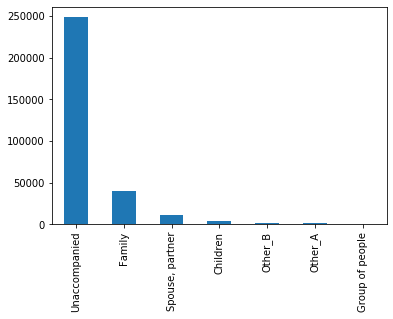

In [31]:
# Checking the NAME_TYPE_SUITE column.
#This column depits that actually who accompanied client when he was applying for the loan

filter_application_df['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.show()

* So from above picture it is clear that most of the people who came for applying a loan was 'Unaccompanied'
* Again this column is Categorical, so we can fill the Null values with Mode

In [32]:
# Finding the Mode Value

#Mode = filter_application_df['NAME_TYPE_SUITE'].mode()
#Mode[0]

In [33]:
# filling the 'NAME_TYPE_SUITE' null values with the Mode value 

#filter_application_df['NAME_TYPE_SUITE'] = filter_application_df['NAME_TYPE_SUITE'].fillna(Mode[0])


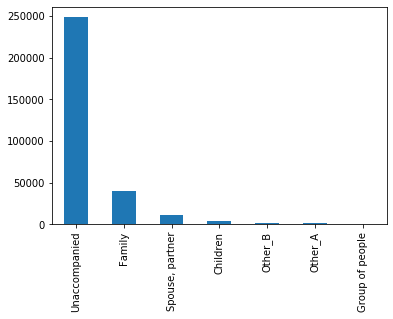

In [34]:
#checking the null values in 'NAME_TYPE_SUITE' 
#print('Count of Null Values:', filter_application_df['NAME_TYPE_SUITE'].isna().sum())

filter_application_df['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.show()

In [35]:
# percentage of 'OBS_30_CNT_SOCIAL_CIRCL' Null values corresponding to the dataframe

print('Proportion of Null Value in "OBS_30_CNT_SOCIAL_CIRCL" in Dataframe: ',(filter_application_df['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()/filter_application_df.shape[0])*100)

Proportion of Null Value in "OBS_30_CNT_SOCIAL_CIRCL" in Dataframe:  0.3320206431639844


* So proportion is very low so we can drop those rows where 'OBS_30_CNT_SOCIAL_CIRCL' value is null

In [36]:
# Dropping those rows where 'OBS_30_CNT_SOCIAL_CIRCLE' is null
filter_application_df = filter_application_df[~((filter_application_df['OBS_30_CNT_SOCIAL_CIRCLE'].isna()))]
filter_application_df.shape

(306490, 69)

In [37]:
# percentage of 'OBS_60_CNT_SOCIAL_CIRCL' Null values corresponding to the dataframe

print('Proportion of Null Value in "OBS_60_CNT_SOCIAL_CIRCL" in Dataframe: ',(filter_application_df['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()/filter_application_df.shape[0])*100)

Proportion of Null Value in "OBS_60_CNT_SOCIAL_CIRCL" in Dataframe:  0.0


* Here it is showing proportion as 0
* We can check if after removing the null rows for 'OBS_30_CNT_SOCIAL_CIRCL', we dont have null rows for this column
* If so then it means that they were the same applicants who have not provided the 'OBS_30_CNT_SOCIAL_CIRCLE' and 'OBS_60_CNT_SOCIAL_CIRCLE' information 

In [38]:
#checking the NULL values in 'OBS_60_CNT_SOCIAL_CIRCL' column 

filter_application_df['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

* Gotcha! We were right


In [39]:
# checking if 'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE' still have null values or it is the same situation as above


print('Null Value in "DEF_30_CNT_SOCIAL_CIRCLE":', filter_application_df['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum())

print('Null Value in "DEF_60_CNT_SOCIAL_CIRCLE":', filter_application_df['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum())

Null Value in "DEF_30_CNT_SOCIAL_CIRCLE": 0
Null Value in "DEF_60_CNT_SOCIAL_CIRCLE": 0


* So Yes! We are correct!

In [40]:
#checking the Null values in dataframe
filter_application_df.isna().sum().sort_values(axis=0, ascending = False )

AMT_REQ_CREDIT_BUREAU_YEAR     41349
AMT_REQ_CREDIT_BUREAU_MON      41349
AMT_REQ_CREDIT_BUREAU_WEEK     41349
AMT_REQ_CREDIT_BUREAU_DAY      41349
AMT_REQ_CREDIT_BUREAU_HOUR     41349
AMT_REQ_CREDIT_BUREAU_QRT      41349
NAME_TYPE_SUITE                 1292
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_CONT_MOBILE                   0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
DAYS_BIRTH                         0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
DAYS_EMPLOYED                      0
NAME_EDUCATION_TYPE                0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
REGION_RATING_CLIENT_W_CITY        0
N

In [41]:
# percentage of 'AMT_GOODS_PRICE' Null values corresponding to the dataframe

print('Proportion of Null Value in "AMT_GOODS_PRICE" in Dataframe: ',(filter_application_df['AMT_GOODS_PRICE'].isna().sum()/filter_application_df.shape[0])*100)

Proportion of Null Value in "AMT_GOODS_PRICE" in Dataframe:  0.09070442755065418


* So proportion is very low so we can drop those rows where 'AMT_GOODS_PRICE' value is null

In [42]:
# Removing unneccessary rows

filter_application_df = filter_application_df[~((filter_application_df['AMT_GOODS_PRICE'].isna()))]
filter_application_df.shape

(306212, 69)

In [43]:
# percentage of 'AMT_ANNUITY' Null values corresponding to the dataframe

print('Proportion of Null Value in "AMT_ANNUITY" in Dataframe: ',(filter_application_df['AMT_ANNUITY'].isna().sum()/filter_application_df.shape[0])*100)

Proportion of Null Value in "AMT_ANNUITY" in Dataframe:  0.003918853604692174


* So proportion is very low so we can drop those rows where 'AMT_ANNUITY' value is null

In [44]:
# Removing unneccessary rows

filter_application_df = filter_application_df[~((filter_application_df['AMT_ANNUITY'].isna()))]
filter_application_df.shape

(306200, 69)

In [45]:
# percentage of 'DAYS_LAST_PHONE_CHANGE' Null values corresponding to the dataframe

print('Proportion of Null Value in "DAYS_LAST_PHONE_CHANGE" in Dataframe: ',(filter_application_df['DAYS_LAST_PHONE_CHANGE'].isna().sum()/filter_application_df.shape[0])*100)

Proportion of Null Value in "DAYS_LAST_PHONE_CHANGE" in Dataframe:  0.00032658393207054214


In [46]:
# Removing unneccessary rows

filter_application_df = filter_application_df[~((filter_application_df['DAYS_LAST_PHONE_CHANGE'].isna()))]
filter_application_df.shape

(306199, 69)

In [47]:
#checking the Null values in dataframe
filter_application_df.isna().sum().sort_values(axis=0, ascending = False )

AMT_REQ_CREDIT_BUREAU_YEAR     41301
AMT_REQ_CREDIT_BUREAU_MON      41301
AMT_REQ_CREDIT_BUREAU_WEEK     41301
AMT_REQ_CREDIT_BUREAU_DAY      41301
AMT_REQ_CREDIT_BUREAU_HOUR     41301
AMT_REQ_CREDIT_BUREAU_QRT      41301
NAME_TYPE_SUITE                 1014
FLAG_WORK_PHONE                    0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_EMAIL                         0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
REGION_POPULATION_RELATIVE         0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
DAYS_BIRTH                         0
NAME_EDUCATION_TYPE                0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
REG_REGION_NOT_LIVE_REGION         0
NAME_INCOME_TYPE                   0
AMT_GOODS_PRICE                    0
A

* So we have successfully understand how to cater all the Null values presented in the data
* Now we can further filter the application dataframe by finding out which columns are not that much useful to determine default by the customers

### Exploring the remaining columns in Application Data

In [48]:
filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# checking the NAME_EDUCATION_TYPE

filter_application_df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    217667
Higher education                  74341
Incomplete higher                 10220
Lower secondary                    3807
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [50]:
# checking the NAME_FAMILY_STATUS

filter_application_df['NAME_FAMILY_STATUS'].value_counts()

Married                 195662
Single / not married     45165
Civil marriage           29654
Separated                19685
Widow                    16033
Name: NAME_FAMILY_STATUS, dtype: int64

* While checking the Application Data there are some DAYs columns having negative values and we know days cannot be in negative
* Converting DAYS_BIRTH,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.
* By using the abs() function we will convert all above mentioned columns into postive values

In [51]:
#Converting  DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE from negative to positive

filter_application_df['DAYS_BIRTH'] = abs(filter_application_df['DAYS_BIRTH'])


filter_application_df['DAYS_EMPLOYED'] = abs(filter_application_df['DAYS_EMPLOYED'])


filter_application_df['DAYS_ID_PUBLISH'] = abs(filter_application_df['DAYS_ID_PUBLISH'])

filter_application_df['DAYS_REGISTRATION'] = abs(filter_application_df['DAYS_REGISTRATION'])

filter_application_df['DAYS_LAST_PHONE_CHANGE'] = abs(filter_application_df['DAYS_LAST_PHONE_CHANGE'])


In [52]:
# Checking dataframe

filter_application_df.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Exploring the contact information provided by the client and how it is related to the Target variable

In [53]:
# Exploring the FLAG_MOBIL column

filter_application_df['FLAG_MOBIL'].value_counts()

1    306199
Name: FLAG_MOBIL, dtype: int64

* Here we have only one value for the defaluter and non- defaulter client so we not need to take this column into our study 
* We will drop 'FLAG_MOBIL'column from our study

In [54]:
#dropping 'FLAG_MOBIL' column from our dataframe

filter_application_df.drop(['FLAG_MOBIL'], axis=1, inplace=True)
filter_application_df.shape

(306199, 68)

In [55]:
# Contact Info with Target Column

contact_col = ['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']

contact_cor = filter_application_df[contact_col].corr()
contact_cor

,TARGET,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
TARGET,1.000000,0.046191,0.028371,0.000241,-0.023960,-0.001760
FLAG_EMP_PHONE,0.046191,1.000000,0.234012,-0.013280,-0.016346,0.062715
FLAG_WORK_PHONE,0.028371,0.234012,1.000000,0.021503,0.292254,-0.011755
FLAG_CONT_MOBILE,0.000241,-0.013280,0.021503,1.000000,0.006156,-0.005519
FLAG_PHONE,-0.023960,-0.016346,0.292254,0.006156,1.000000,0.014487
FLAG_EMAIL,-0.001760,0.062715,-0.011755,-0.005519,0.014487,1.000000


* plotting heatmap for visualization

 

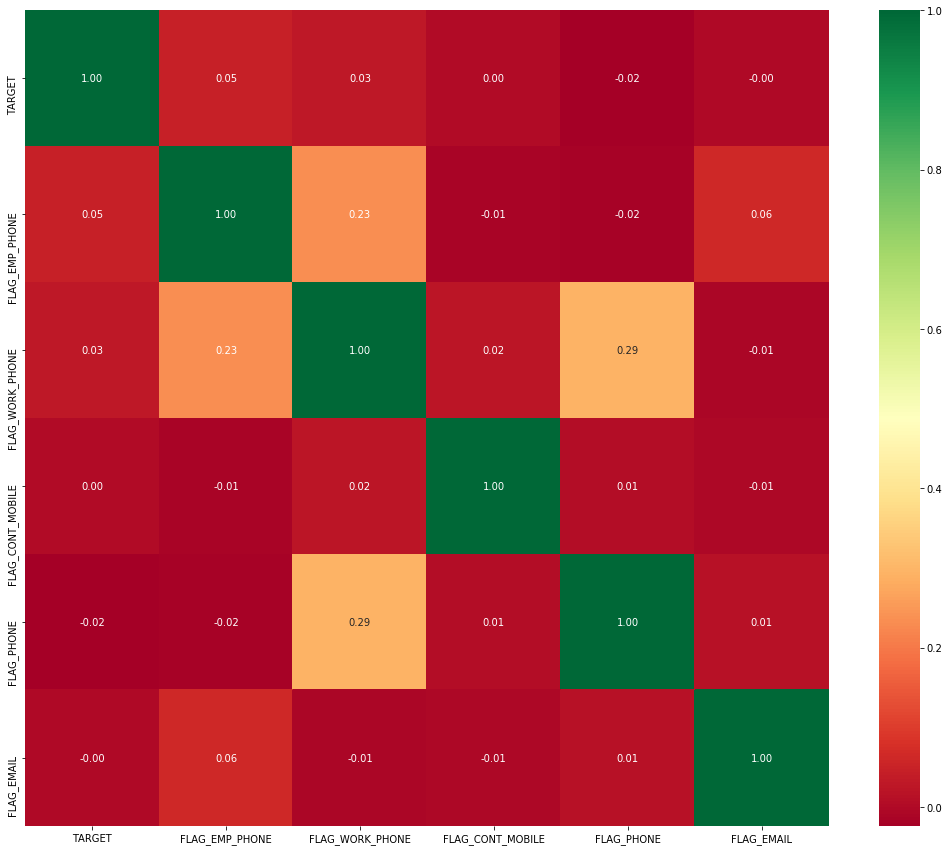

In [56]:
plt.figure(figsize=[18,15])
sns.heatmap(contact_cor, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

* Here we cannot able to find any strong correlation between the Contact Information columns and the Target Varibale 

* It is good to drop all these columns 

In [57]:
# removing the target variable and adding the 'FLAG_MOBIL' column into the contact_col list
contact_col.remove('TARGET')

contact_col

['FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [58]:
# dropping the contact columns from the application dataframe

filter_application_df.drop(labels=contact_col, axis=1,inplace=True)
filter_application_df.shape

(306199, 63)

### Exploring the Flag Documents columns and checking their relevancy

In [59]:
#creating a list of all documents column 


doc_col = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# creating a new dataframe out of all flag_documets columns and adding Target variable into it            
df_doc = filter_application_df[doc_col+['TARGET']]
df_doc.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
#Replacing TARGET varialbe into categorical for this analysis
df_doc['TARGET'] = df_doc['TARGET'].replace({0:'Repayer', 1:'Defaulter'})

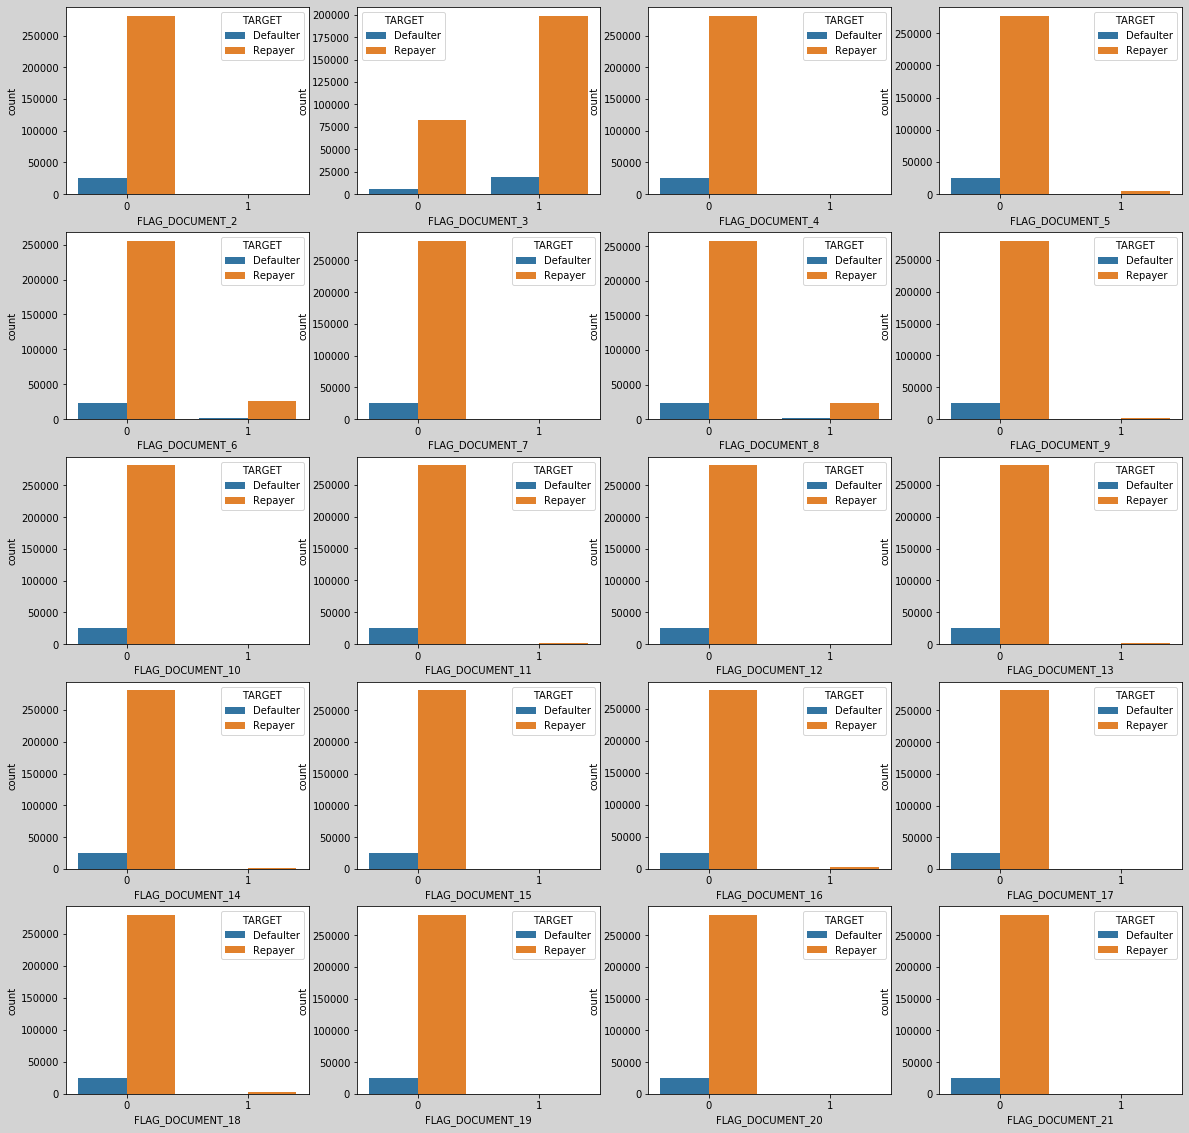

In [61]:
fig, a = plt.subplots(5,4, figsize=[20,20])
sns.countplot(df_doc['FLAG_DOCUMENT_2'], hue=df_doc['TARGET'], ax= a[0][0])
sns.countplot(df_doc['FLAG_DOCUMENT_3'], hue=df_doc['TARGET'], ax= a[0][1])
sns.countplot(df_doc['FLAG_DOCUMENT_4'], hue=df_doc['TARGET'], ax= a[0][2])
sns.countplot(df_doc['FLAG_DOCUMENT_5'], hue=df_doc['TARGET'], ax= a[0][3])
sns.countplot(df_doc['FLAG_DOCUMENT_6'], hue=df_doc['TARGET'], ax= a[1][0])
sns.countplot(df_doc['FLAG_DOCUMENT_7'], hue=df_doc['TARGET'], ax= a[1][1])
sns.countplot(df_doc['FLAG_DOCUMENT_8'], hue=df_doc['TARGET'], ax= a[1][2])
sns.countplot(df_doc['FLAG_DOCUMENT_9'], hue=df_doc['TARGET'], ax= a[1][3])
sns.countplot(df_doc['FLAG_DOCUMENT_10'], hue=df_doc['TARGET'], ax= a[2][0])
sns.countplot(df_doc['FLAG_DOCUMENT_11'], hue=df_doc['TARGET'], ax= a[2][1])
sns.countplot(df_doc['FLAG_DOCUMENT_12'], hue=df_doc['TARGET'], ax= a[2][2])
sns.countplot(df_doc['FLAG_DOCUMENT_13'], hue=df_doc['TARGET'], ax= a[2][3])
sns.countplot(df_doc['FLAG_DOCUMENT_14'], hue=df_doc['TARGET'], ax= a[3][0])
sns.countplot(df_doc['FLAG_DOCUMENT_15'], hue=df_doc['TARGET'], ax= a[3][1])
sns.countplot(df_doc['FLAG_DOCUMENT_16'], hue=df_doc['TARGET'], ax= a[3][2])
sns.countplot(df_doc['FLAG_DOCUMENT_17'], hue=df_doc['TARGET'], ax= a[3][3])
sns.countplot(df_doc['FLAG_DOCUMENT_18'], hue=df_doc['TARGET'], ax= a[4][0])
sns.countplot(df_doc['FLAG_DOCUMENT_19'], hue=df_doc['TARGET'], ax= a[4][1])
sns.countplot(df_doc['FLAG_DOCUMENT_20'], hue=df_doc['TARGET'], ax= a[4][2])
sns.countplot(df_doc['FLAG_DOCUMENT_21'], hue=df_doc['TARGET'], ax= a[4][3])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

* The above graph shows that in most of the loan application cases, Other than FLAG_DOCUMENTS_3 clients has not submitted any FLAG_DOCUMENTS. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. 

* Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [62]:
# Removing the all FLAG_DOCUMENTS columns other the FLAG_DOCUMENTS_3
doc_col.remove('FLAG_DOCUMENT_3')
filter_application_df.drop(labels=doc_col, inplace=True, axis=1)
filter_application_df.shape

(306199, 44)

In [63]:
#Chekcing the info of the filtered dataframe
filter_application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306199 non-null  int64  
 1   TARGET                       306199 non-null  int64  
 2   NAME_CONTRACT_TYPE           306199 non-null  object 
 3   CODE_GENDER                  306199 non-null  object 
 4   FLAG_OWN_CAR                 306199 non-null  object 
 5   FLAG_OWN_REALTY              306199 non-null  object 
 6   CNT_CHILDREN                 306199 non-null  int64  
 7   AMT_INCOME_TOTAL             306199 non-null  float64
 8   AMT_CREDIT                   306199 non-null  float64
 9   AMT_ANNUITY                  306199 non-null  float64
 10  AMT_GOODS_PRICE              306199 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             306199 non-null  object 
 13 

* So after removing the unnecessary columns we are left with 46 columns 

In [64]:
# Exploring the income of the client

filter_application_df['AMT_INCOME_TOTAL'].describe()

count    3.061990e+05
mean     1.686648e+05
std      2.373632e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
filter_application_df['AMT_INCOME_TOTAL'].min()

25650.0

In [66]:
filter_application_df['AMT_INCOME_TOTAL'].max()

117000000.0

* from the above stats we have seen that the minimum salary in the database is ~25k and max is ~11 crore

In [67]:
# we can seggregate the salary of the client into some specific range

bins = [0,1000000,2000000,3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000,10000000,100000000,1000000000  ] 
label = ['0-1M', '1M-2M','2M-3M', '3M-4M','4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M-20M', '20M and above']

filter_application_df['AMT_INCOME_RANGE'] = pd.cut(filter_application_df['AMT_INCOME_TOTAL'], bins=bins, labels=label)

filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0-1M
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0-1M
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M


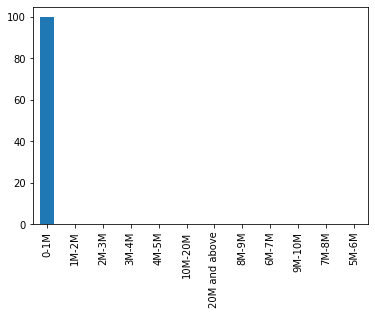

In [68]:
# Analyzing the range of the client income  

(filter_application_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100).plot.bar()
fig.set_facecolor("lightgrey")
plt.show()

#### Insight

* ~99 percent people applying for a loan having salary between 0 - 1000000

In [69]:
# Exploring the credit amount of loan of the client

filter_application_df['AMT_CREDIT'].describe()

count    3.061990e+05
mean     5.997997e+05
std      4.025770e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.175000e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [70]:
filter_application_df['AMT_CREDIT'].max()

4050000.0

* from the above stats we have seen that the minimum loan amount in the database is ~45k and max is ~40 Lakhs

In [71]:
# we can seggregate the loan amount of the client into some specific range

bins = [0,100000,200000,300000, 400000, 500000, 600000, 700000, 800000, 900000,1000000,5000000  ] 
label = ['0-100k', '100k-200k','200k-300k', '300k-400k','400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M and above' ]

filter_application_df['AMT_CREDIT_RANGE'] = pd.cut(filter_application_df['AMT_CREDIT'], bins=bins, labels=label)

filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0-1M,400k-500k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,1M and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,100k-200k
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0-1M,300k-400k
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,500k-600k


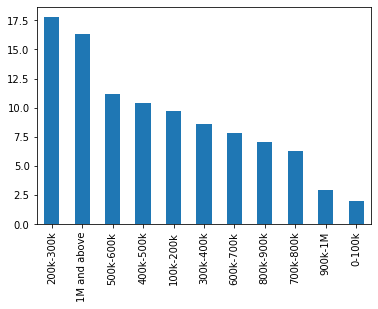

In [72]:
# Analyzing the range of the client income  

(filter_application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100).plot.bar()
fig.set_facecolor("lightgrey")
plt.show()

#### Insight

* More Than 16% loan applicants have taken loan which amounts more than 1M.

In [73]:
# we can seggregate the AGE of the client into some specific range


filter_application_df['AGE'] = filter_application_df['DAYS_BIRTH']//365
bins = [0,20,30,40,50,60,100]
label = ['0-20','20-30','30-40','40-50','50-60','60 above']

filter_application_df['AGE_RANGE']=pd.cut(filter_application_df['AGE'],bins=bins,labels=label)
filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0-1M,400k-500k,25,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,1M and above,45,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,100k-200k,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0-1M,300k-400k,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,500k-600k,54,50-60


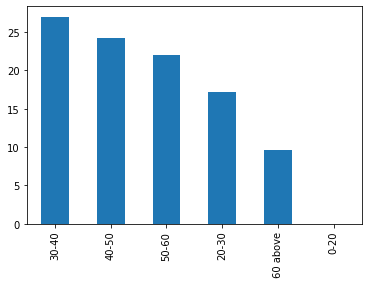

In [74]:
# Analyzing the range of the client AGE  

(filter_application_df['AGE_RANGE'].value_counts(normalize=True)*100).plot.bar()
fig.set_facecolor("lightgrey")
plt.show()

* Most of the loan applicants have age above 30 and less than 40 years. There is barely anyone less than age of 20 applying for the loan.

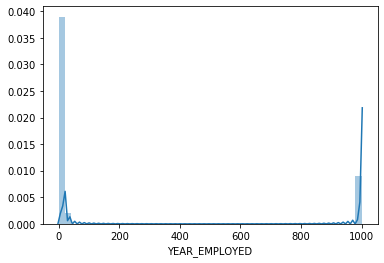

In [75]:
# we can seggregate the EMPLOYMWNT of the client into some specific range


filter_application_df['YEAR_EMPLOYED'] = filter_application_df['DAYS_EMPLOYED']//365
sns.distplot(filter_application_df['YEAR_EMPLOYED'])
plt.show()

* From the above chart we can see there are some outliers available in this column 
* We can be sure by plotting boxplot for the same

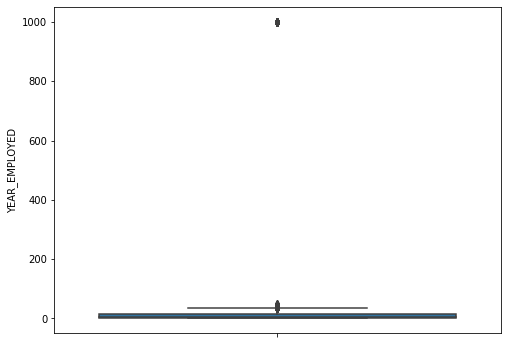

In [76]:
# Plotting box plot for the YEAR_EMPLOYED
plt.figure(figsize=[8,6])
sns.boxplot(filter_application_df['YEAR_EMPLOYED'], orient='v')
plt.show()

#### Insight

* There is an extreme outlier available on the this 'YEAR_EMPLOYED' column 
* By dropping that row we can cater the outlier in this case

In [77]:
#Seggregating into bins

bins = [0,5,10,20,30,40,50,60,100]
label = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']


filter_application_df['YEAR_RANGE']=pd.cut(filter_application_df['YEAR_EMPLOYED'],bins=bins,labels=label)
filter_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_RANGE,YEAR_EMPLOYED,YEAR_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0-1M,400k-500k,25,20-30,1,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,1M and above,45,40-50,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,100k-200k,52,50-60,0,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0-1M,300k-400k,52,50-60,8,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,500k-600k,54,50-60,8,5-10


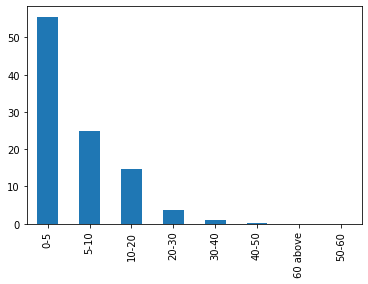

In [78]:
# Analyzing the range of the client AGE  

(filter_application_df['YEAR_RANGE'].value_counts(normalize=True)*100).plot.bar()
fig.set_facecolor("lightgrey")
plt.show()

* More than 50% of the clients applied for the loan having less than 5 years of work experience 

### Analyzing the Previous Application Dataframe

In [79]:
#cheking the top values of previous application data
prevapplication_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


* Here again in previous application data we can see there are some null values in the database

In [80]:
# Inspecting the previous application dataframe 

prevapplication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

* Again some of the columns pertaining lots of Null values

### Analyzing the NULL values in the dataframe

In [81]:
#finding the percentage of null values in previous application data

missing_prevapp_df =round((prevapplication_df.isna().sum()/prevapplication_df.shape[0])*100,2)
missing_prevapp_df = missing_prevapp_df.reset_index()
missing_prevapp_df =missing_prevapp_df.rename(columns={'index':'Column', 0:'Value'})

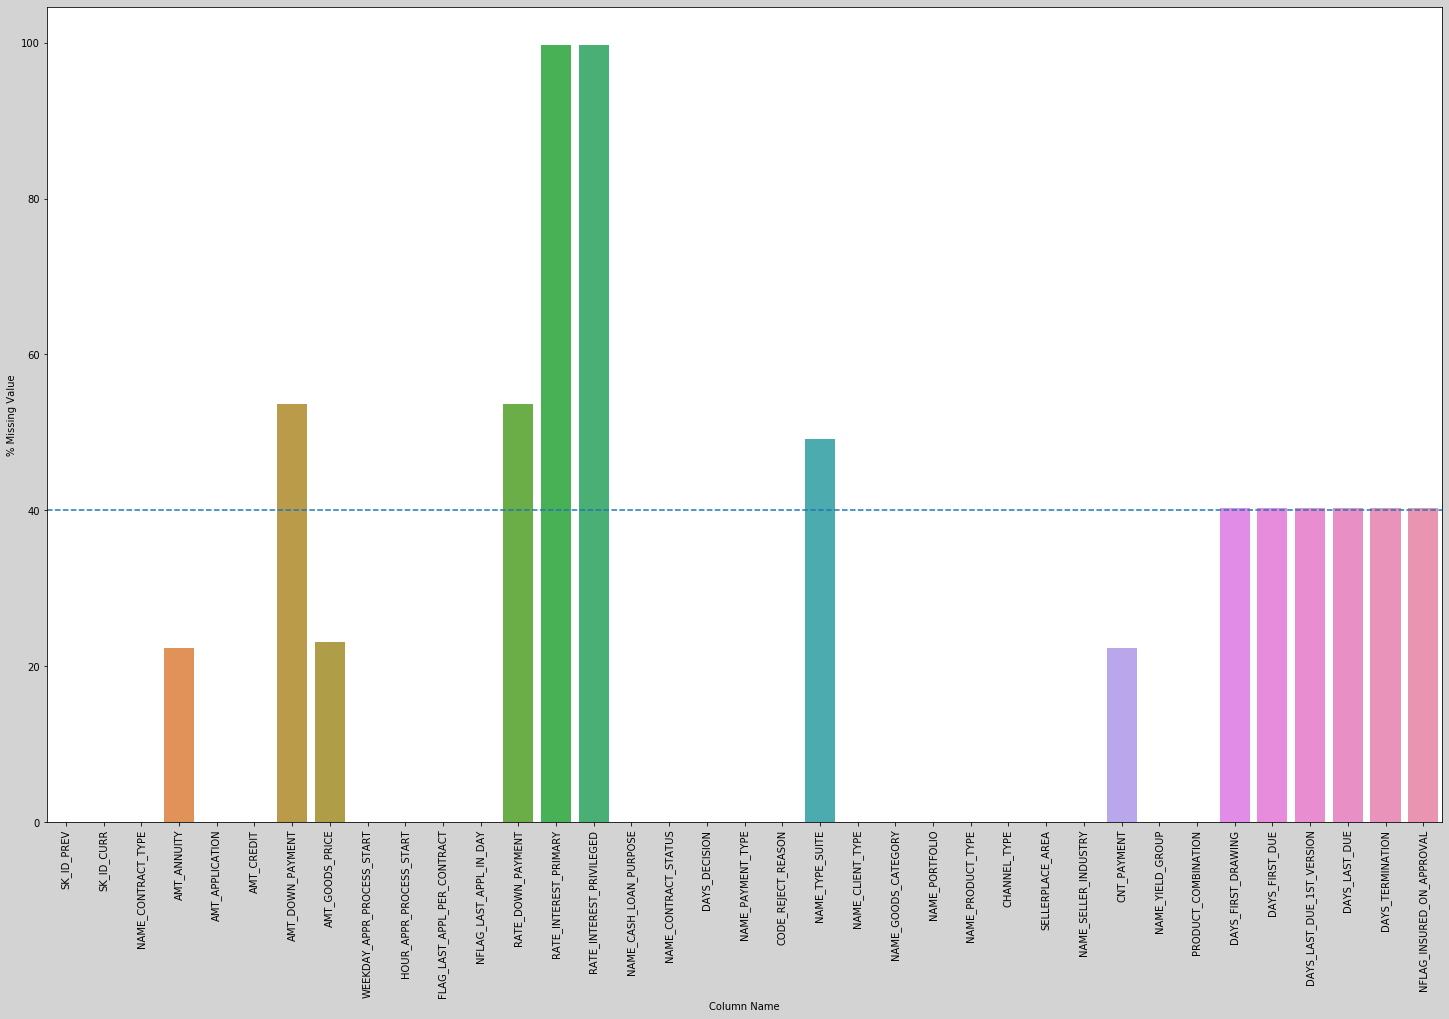

In [82]:
#plotting the columns having the null values and putting a threshold =40%

fig = plt.figure(figsize=[25,15])
sns.barplot(missing_prevapp_df['Column'], missing_prevapp_df['Value'],  data=missing_prevapp_df)
plt.xlabel('Column Name')
plt.ylabel('% Missing Value')
plt.xticks(rotation = 90)
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.axhline(40, ls = '--')
plt.show()

In [83]:
#columns name having more than 40% values as Null in previous application data
col_null_prevapp_40 = missing_prevapp_df[missing_prevapp_df['Value']>=40]
col_null_prevapp_40.reset_index(inplace = True, drop = True)
col_null_prevapp_40

,Column,Value
0,AMT_DOWN_PAYMENT,53.64
1,RATE_DOWN_PAYMENT,53.64
2,RATE_INTEREST_PRIMARY,99.64
3,RATE_INTEREST_PRIVILEGED,99.64
4,NAME_TYPE_SUITE,49.12
5,DAYS_FIRST_DRAWING,40.30
6,DAYS_FIRST_DUE,40.30
7,DAYS_LAST_DUE_1ST_VERSION,40.30
8,DAYS_LAST_DUE,40.30
9,DAYS_TERMINATION,40.30


In [84]:
# list of the columns Name in the Previous Application data which have more than 40% values as Null

col2 = col_null_prevapp_40['Column'].tolist()

#### Dropping unnecessary columns from the previous datasets

In [85]:
# dropping the uneccessary columns from the previous application dataframe
filter_prevapp_df = prevapplication_df.drop(labels=col2, axis = 1)

In [86]:
#checking the previous application_data after removing unwanted columns 
filter_prevapp_df.shape

(1670214, 26)

In [87]:
# inspecting the column types after after removal of unnecessary columns
filter_prevapp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


* There are some columns like "WEEKDAY_APPR_PROCESS_START" and "HOUR_APPR_PROCESS_START", which states that day of the week and hour of the day did the client apply for previous application respectively. These columns are redundant and can be drop from the scope of study

* There are some other columns like "FLAG_LAST_APPL_PER_CONTRACT" and "NFLAG_LAST_APPL_IN_DAY", which states that whether the application is the last application for the previous contract and the application was the last application per day of the client respectively . These columns are redundant and can be drop from the scope of study





In [88]:
redundant_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']


filter_prevapp_df.drop(labels=redundant_col, axis=1, inplace=True)
filter_prevapp_df.shape

(1670214, 22)

* After deleting unnecessary columns, there are 22 columns remaining in previou application dataframe

In [89]:
# checking if all the values in DAYS_DECISION is negative

filter_prevapp_df[filter_prevapp_df['DAYS_DECISION']>0]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


* All the values in the 'DAYS_DECISION' is negative and Days cannot be in negative. So we have to convert these negative values into the positive



In [90]:
# converting the negative days values into non-negative values

filter_prevapp_df['DAYS_DECISION'] = abs(filter_prevapp_df['DAYS_DECISION'])
filter_prevapp_df['DAYS_DECISION'].head(10)

0     73
1    164
2    301
3    512
4    781
5    684
6     14
7     21
8    386
9     57
Name: DAYS_DECISION, dtype: int64

In [91]:
#finding the null values in the previous dataset

filter_prevapp_df.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE           385515
AMT_ANNUITY               372235
CNT_PAYMENT               372230
PRODUCT_COMBINATION          346
AMT_CREDIT                     1
DAYS_DECISION                  0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
SK_ID_PREV                     0
dtype: int64

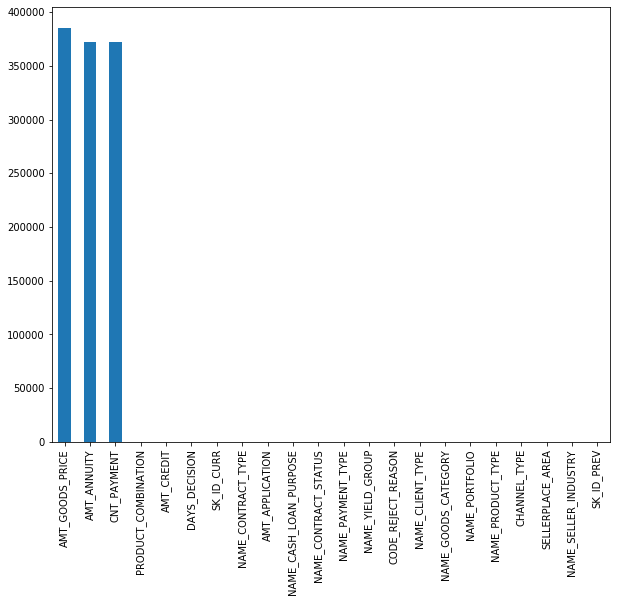

In [92]:
#finding the null values in the previous dataset
plt.figure(figsize=[10,8])
filter_prevapp_df.isna().sum().sort_values(ascending=False).plot.bar()
plt.show()

#### Insight

* Out of the remaing columns we have maximum null values present in the AMT_GOODS_PRICE followed by AMT_ANNUITY and CNT_PAYMENT

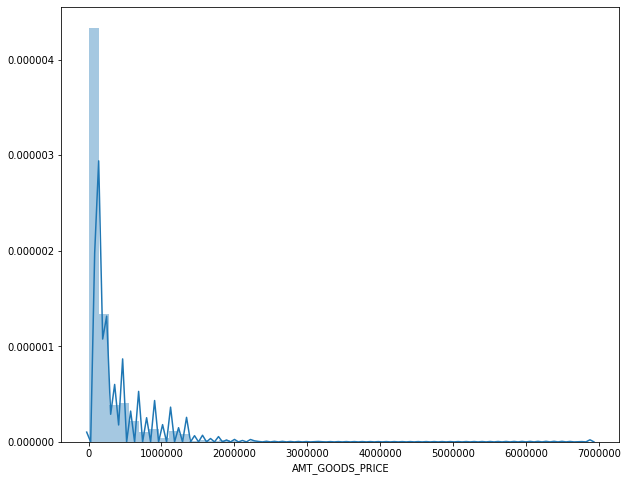

In [93]:
# checking the AMT_GOOD_PRICE

plt.figure(figsize=[10,8])
sns.distplot(filter_prevapp_df['AMT_GOODS_PRICE'])
plt.show()


#### Insight

* in this case we can replace the null values using the median of the column

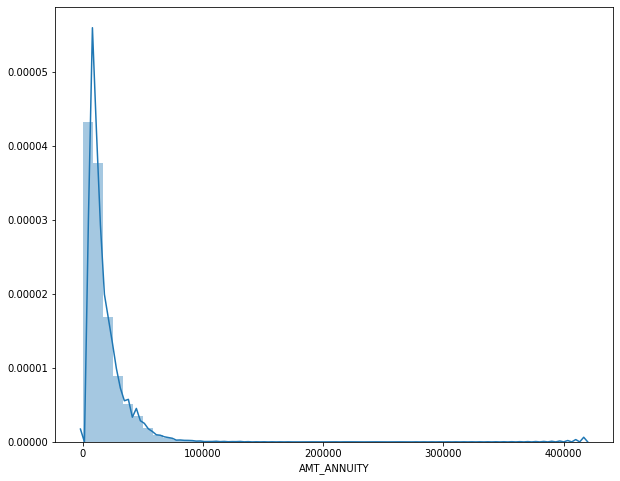

In [94]:
# Distribution plot for the 'AMT_ANNUITY'

plt.figure(figsize=[10,8])
sns.distplot(filter_prevapp_df['AMT_ANNUITY'])
plt.show()


#### Insight

* in this case we can replace the null values using the median of the column

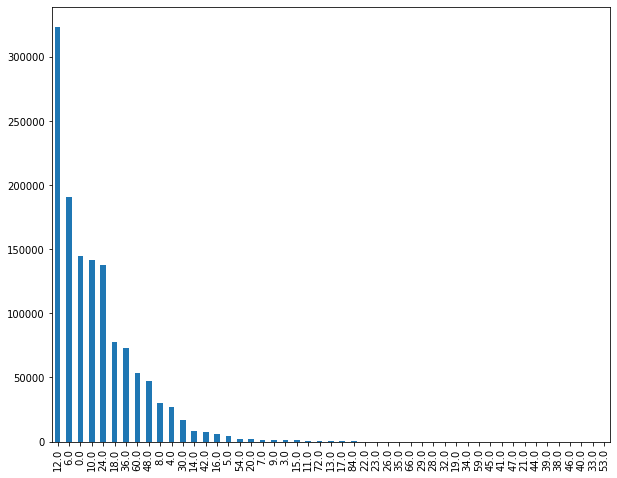

In [95]:
# checking Null values in 'CNT'
plt.figure(figsize=[10,8])
filter_prevapp_df['CNT_PAYMENT'].value_counts().plot.bar()
plt.show()

#### Insight

* in this case we can replace the null values using the mode of the column as this is categorical column



In [96]:
filter_prevapp_df['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

#### Insight

* in this case we can replace the null values using the mode of the column as this is categorical column

* we have one null value available in the AMT Credit column so we can drop that row from the study



## Identifying the Outliers

In [97]:
# Finding Outliers in the Application datasets

filter_application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   306199 non-null  int64   
 1   TARGET                       306199 non-null  int64   
 2   NAME_CONTRACT_TYPE           306199 non-null  object  
 3   CODE_GENDER                  306199 non-null  object  
 4   FLAG_OWN_CAR                 306199 non-null  object  
 5   FLAG_OWN_REALTY              306199 non-null  object  
 6   CNT_CHILDREN                 306199 non-null  int64   
 7   AMT_INCOME_TOTAL             306199 non-null  float64 
 8   AMT_CREDIT                   306199 non-null  float64 
 9   AMT_ANNUITY                  306199 non-null  float64 
 10  AMT_GOODS_PRICE              306199 non-null  float64 
 11  NAME_TYPE_SUITE              305185 non-null  object  
 12  NAME_INCOME_TYPE             306199 non-null

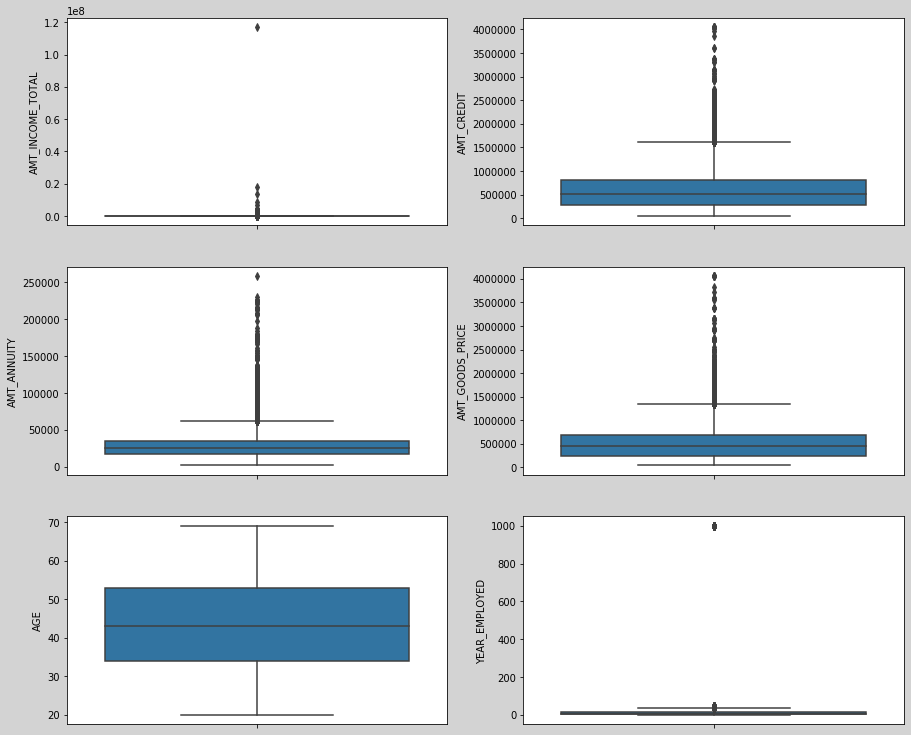

In [98]:
# Finding the outliers in some numeric columns in the application datasets
fig, a = plt.subplots(3,2, figsize=[15,13])

sns.boxplot(filter_application_df['AMT_INCOME_TOTAL'], orient='v', ax=a[0][0])
sns.boxplot(filter_application_df['AMT_CREDIT'], orient='v', ax=a[0][1])
sns.boxplot(filter_application_df['AMT_ANNUITY'], orient='v',ax=a[1][0])
sns.boxplot(filter_application_df['AMT_GOODS_PRICE'], orient='v',ax=a[1][1])
sns.boxplot(filter_application_df['AGE'], orient='v',ax=a[2][0])
sns.boxplot(filter_application_df['YEAR_EMPLOYED'], orient='v', ax=a[2][1])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()


#### Insights

* 'AMT_INCOME_TOTAL', AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE,CNT_CHILDREN and YEAR_EMPLOYED have some number of outliers.

* AGE column does not have outlier in Application data

###### Why These are outliers

* In AMT_INCOME_TOTAL column approximately 99% of the clients income fall between 0-1000000 bracket and there are some people having income more than that and one cliend also have salary of ~11 crore so in such a way these are outliers in the Income Column

* In AMT_CREDIT, from the above boxplot it is clear that there are some people demanding for more than 150K loan but data is moslty distributed between 0 - 150k. Hence these are outliers in this case

* And same scenario we can see in the other columns


In [99]:
# Finding Outliers in the Previous Application datasets

filter_prevapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

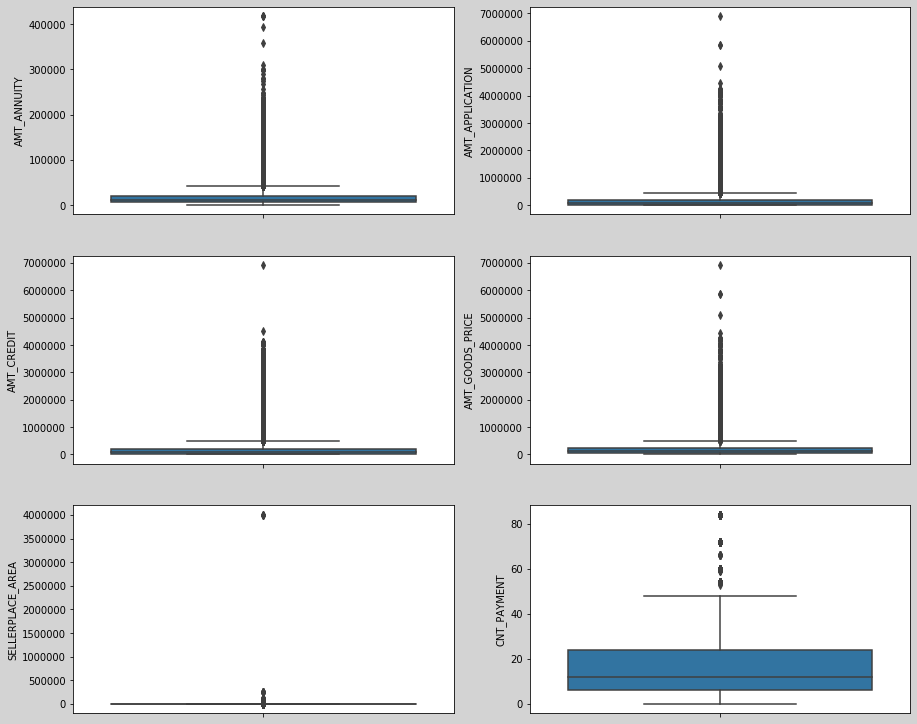

In [100]:
# Finding the outliers in some numeric columns in the application datasets
fig, a = plt.subplots(3,2, figsize=[15,13])
sns.boxplot(filter_prevapp_df['AMT_ANNUITY'], orient='v', ax=a[0][0])
sns.boxplot(filter_prevapp_df['AMT_APPLICATION'], orient='v', ax=a[0][1])
sns.boxplot(filter_prevapp_df['AMT_CREDIT'], orient='v',ax=a[1][0])
sns.boxplot(filter_prevapp_df['AMT_GOODS_PRICE'], orient='v',ax=a[1][1])
sns.boxplot(filter_prevapp_df['SELLERPLACE_AREA'], orient='v',ax=a[2][0])
sns.boxplot(filter_prevapp_df['CNT_PAYMENT'], orient='v', ax=a[2][1])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

#### Insights

* Other than the CNT_PAYMENT column all the other columns have huge outliers available in the previous data sets

###### Why Outliers

* As we can see some of the points in each of the columns are above than the max whisker, so these points are the outliers in our datasets

## DATA ANALYSIS

### DATA IMBALANCE in application datasets

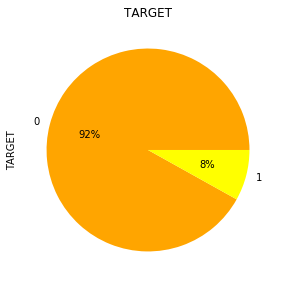

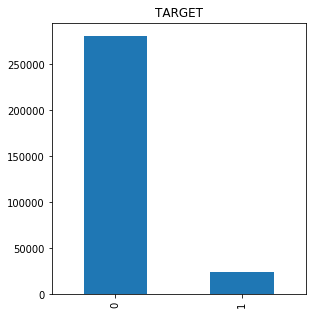

In [101]:
# finding the imbalance in the TARGET varible
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('TARGET')
filter_application_df['TARGET'].value_counts(normalize = True, ).plot.pie(autopct = "%1.0f%%", colors=['Orange','Yellow'])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('TARGET')
filter_application_df['TARGET'].value_counts().plot.bar()
plt.show()

#### Insight

* 8% out of total client population have difficulties in repaying loans.

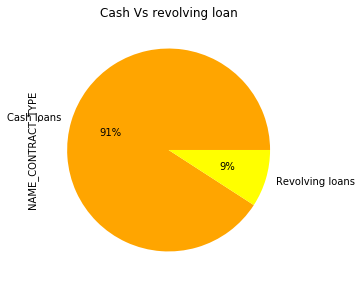

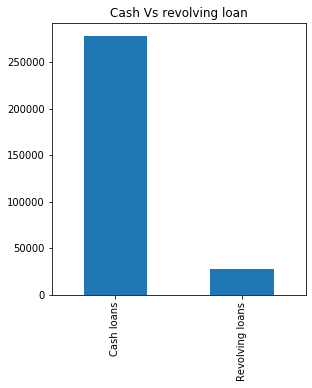

In [102]:
# checking imbalance in NAME_CONTACT_TYPE column 

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Cash Vs revolving loan')
filter_application_df['NAME_CONTRACT_TYPE'].value_counts(normalize = True, ).plot.pie(autopct = "%1.0f%%", colors=['Orange','Yellow'])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Cash Vs revolving loan')
filter_application_df['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.show()

#### Insights
* Data is more inclined towards the CASH LOAN 

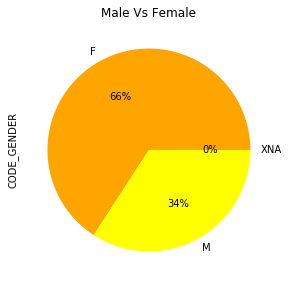

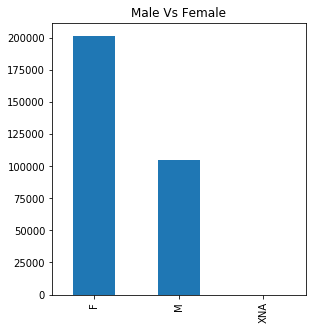

In [103]:
# checking imbalance in Gender_code column 


plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Male Vs Female')
filter_application_df['CODE_GENDER'].value_counts(normalize = True, ).plot.pie(autopct = "%1.0f%%", colors=['Orange','Yellow'])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Male Vs Female')
filter_application_df['CODE_GENDER'].value_counts().plot.bar()
plt.show()


#### Insight

* Population of the Female client is comparatively more than the Male Client

* There are some XNA values available in the Code_Gender

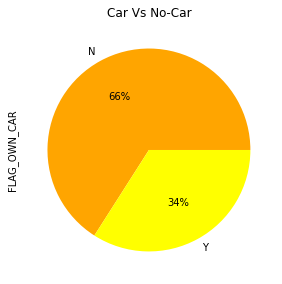

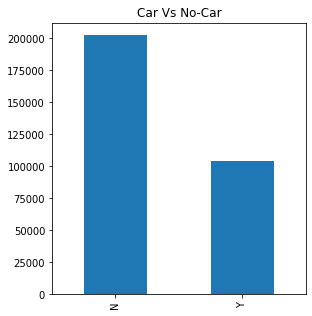

In [104]:
# checking imbalance in FLAg_OWN_Car column 

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Car Vs No-Car')
filter_application_df['FLAG_OWN_CAR'].value_counts(normalize = True, ).plot.pie(autopct = "%1.0f%%", colors=['Orange','Yellow'])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Car Vs No-Car')
filter_application_df['FLAG_OWN_CAR'].value_counts().plot.bar()
plt.show()


#### Insights

* more than 60% people applying for the loan are among them who don't have car

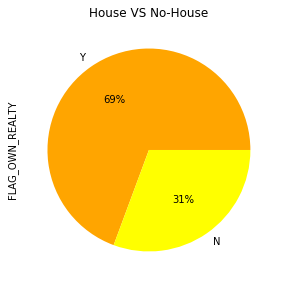

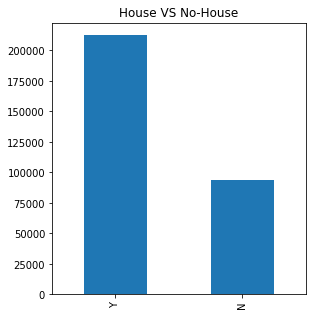

In [105]:
# checking imbalance in FLAg_OWN_REALTY column 
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('House VS No-House')
filter_application_df['FLAG_OWN_REALTY'].value_counts(normalize = True, ).plot.pie(autopct = "%1.0f%%", colors=['Orange','Yellow'])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('House VS No-House')
filter_application_df['FLAG_OWN_REALTY'].value_counts().plot.bar()
plt.show()


#### Insights

* data is imbalanced and more skewed towards those who have house

## Univariate Analysis

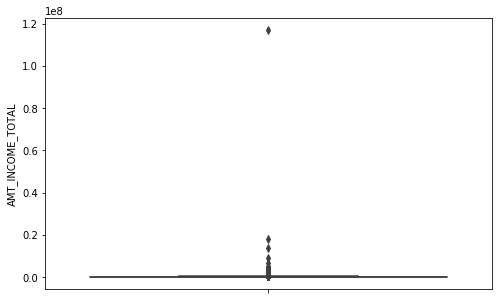

In [106]:
# Checking the distribution of Indiviual income
plt.figure(figsize=(8,5))
sns.boxplot(filter_application_df['AMT_INCOME_TOTAL'], orient='v')
plt.show()

#### insights

* there are some outliers available in our AMT_INCOME_TOTAL column 

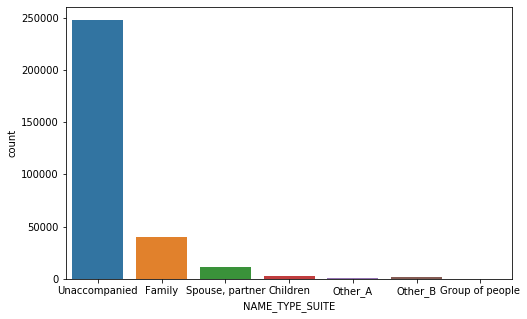

In [107]:
# exloring the NAME_TYPE_SUITE column   

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['NAME_TYPE_SUITE'])
plt.show()


#### Insights

* Most of the cliet come alone while applying for a loan

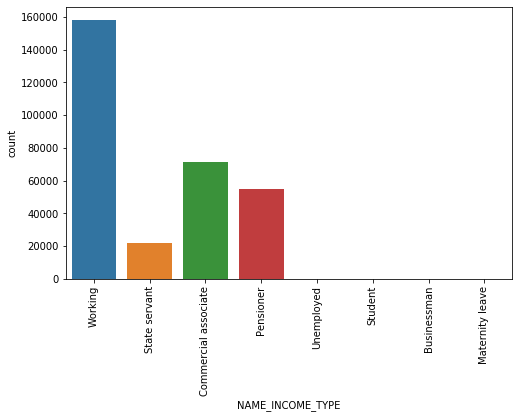

In [108]:
# exloring the NAME_INCOME_TYPE column   

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.show()


#### Insihts

* Most of the loan is demanded by working class people

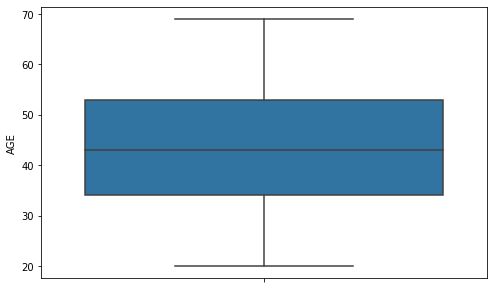

In [109]:
# Checking the distribution of Indiviual AGE
plt.figure(figsize=(8,5))
sns.boxplot(filter_application_df['AGE'], orient='v')
plt.show()

#### Insights

* There is no as such outliers presented in AGE column

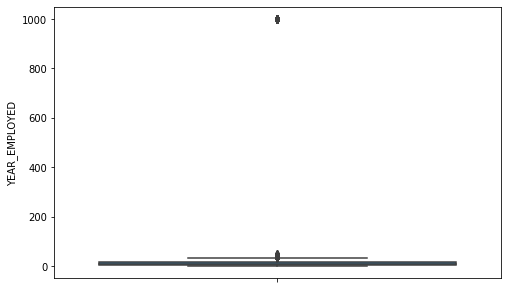

In [110]:
# Checking the distribution of Indiviual YEAR of emloyment
plt.figure(figsize=(8,5))
sns.boxplot(filter_application_df['YEAR_EMPLOYED'], orient='v')
plt.show()

#### Insight

* there are some outliers available in this column

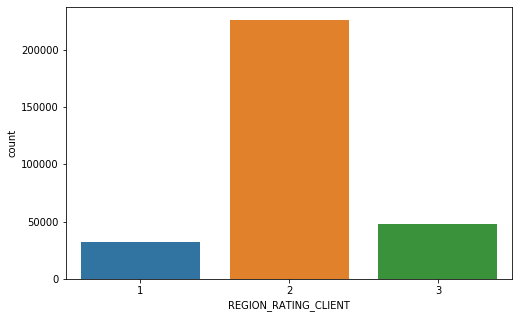

In [111]:
# Checking the distribution of client coming from which rating region 
plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['REGION_RATING_CLIENT'], orient='v')
plt.show()

#### Insight

* Most of the client coming from the 2nd rating region

## Segmented Univariate Analysis

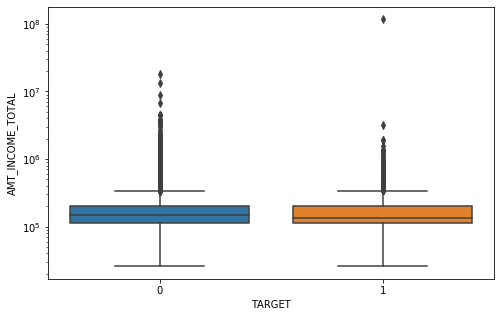

In [112]:
# checking how Income of client is distributed between 'Defaulter' and 'NON-Defaulter'


plt.figure(figsize=(8,5))
sns.boxplot( filter_application_df['TARGET'],filter_application_df['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.show()

#### Insights

* There is an extreme outlier in the income of the defaulter salary

* Mean salary for both defaulter and non-defaulter is almost same

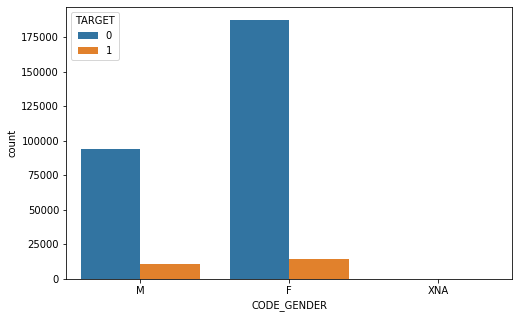

In [113]:
# checking how Gender is distributed between 'Defaulter' and 'NON-Defaulter'

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['CODE_GENDER'],hue=filter_application_df['TARGET'])
plt.show()

In [114]:
filter_application_df.groupby(by=['CODE_GENDER','TARGET'])['TARGET'].count()

CODE_GENDER  TARGET
F            0         187466
             1          14130
M            0          93961
             1          10638
XNA          0              4
Name: TARGET, dtype: int64

In [115]:
# Defaulter Rate between MALE vs FEMALE

print('Defaulter rate of FEMALE',(filter_application_df.groupby
                                                 (by=['CODE_GENDER','TARGET'])['TARGET'].count()[1]/(filter_application_df.groupby
                                                 (by=['CODE_GENDER','TARGET'])['TARGET'].count()[1] +
                                                 filter_application_df.groupby(by=['CODE_GENDER','TARGET'])
                                                 ['TARGET'].count()[0])*100))


print('Defaulter rate MALE',(filter_application_df.groupby
                                            (by=['CODE_GENDER','TARGET'])['TARGET'].count()[3]
                                            /(filter_application_df.groupby
                                            (by=['CODE_GENDER','TARGET'])['TARGET'].count()[3]+filter_application_df.groupby(by=['CODE_GENDER','TARGET'])['TARGET'].count()[2])*100))

Defaulter rate of FEMALE 7.009067640230956
Defaulter rate MALE 10.170269314238185


#### Insight

* MALE is more likely to default more comapared to the FEMALE client
* Some values in this column is 'XNA', which is a kind of data quality issue 

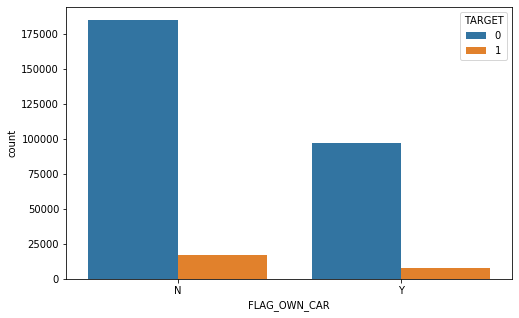

In [116]:
# checking if Car is owned between 'Defaulter' and 'NON-Defaulter'

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['FLAG_OWN_CAR'],hue=filter_application_df['TARGET'])
plt.show()

In [117]:
filter_application_df.groupby(by=['FLAG_OWN_CAR','TARGET'])['TARGET'].count()

FLAG_OWN_CAR  TARGET
N             0         184774
              1          17205
Y             0          96657
              1           7563
Name: TARGET, dtype: int64

In [118]:
# Defaulter Rate between client owning CAR vs not

print('Defaulter rate among who dont owned car',(filter_application_df.groupby
                                                 (by=['FLAG_OWN_CAR','TARGET'])['TARGET'].count()[1]/(filter_application_df.groupby
                                                 (by=['FLAG_OWN_CAR','TARGET'])['TARGET'].count()[1] +
                                                 filter_application_df.groupby(by=['FLAG_OWN_CAR','TARGET'])
                                                 ['TARGET'].count()[0])*100))


print('Defaulter rate among who Owned car',(filter_application_df.groupby
                                            (by=['FLAG_OWN_CAR','TARGET'])['TARGET'].count()[3]
                                            /(filter_application_df.groupby
                                            (by=['FLAG_OWN_CAR','TARGET'])['TARGET'].count()[3]+filter_application_df.groupby(by=['FLAG_OWN_CAR','TARGET'])['TARGET'].count()[2])*100))

Defaulter rate among who dont owned car 8.518212289396422
Defaulter rate among who Owned car 7.256764536557283


#### Insight

* Defaulter rate for those who don't owned car is more as compared to those who Owned car

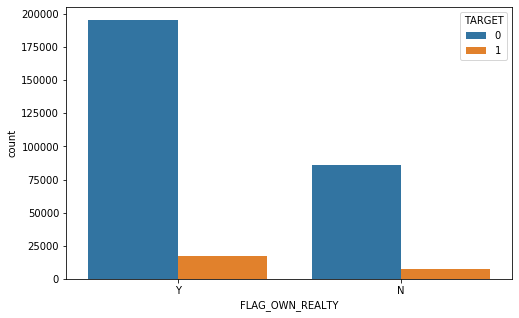

In [119]:
# checking if House is owned impact on between 'Defaulter' and 'NON-Defaulter'

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['FLAG_OWN_REALTY'],hue=filter_application_df['TARGET'])
plt.show()

In [120]:
# Defaulter Rate between client owning House vs not

print('Defaulter rate among who dont owned House',(filter_application_df.groupby(by=['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()[1]
                                                   /(filter_application_df.groupby(by=['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()[1]+
                                                   filter_application_df.groupby(by=['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()[0])*100))


print('Defaulter rate among who Owned House',(filter_application_df.groupby(by=['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()[3]/
                                              (filter_application_df.groupby(by=['FLAG_OWN_REALTY','TARGET'])['TARGET']
                                               .count()[3]+filter_application_df.groupby(by=['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()[2])*100))

Defaulter rate among who dont owned House 8.343721698364497
Defaulter rate among who Owned House 7.976208416531666


#### Insight

* Defaulter rate for those who don't owned House is more as compared to those who Owned House

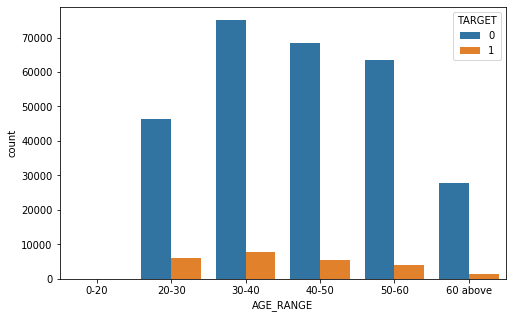

In [121]:
# checking if which AGE RANGE is impact more on between 'Defaulter' and 'NON-Defaulter'

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['AGE_RANGE'],hue=filter_application_df['TARGET'])
plt.show()

In [122]:
# Defaulter Rate between client AGE_RANGE 
print('Defaulter rate among 0-20 Age Range',(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET']
                                             .count()[1]/(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET']
                                             .count()[1]+filter_application_df
                                             .groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[0])*100))


print('Defaulter rate among 20-30 Age Range',(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[3]/(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[3]
                                                                                                                             +filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[2])*100))

print('Defaulter rate among 30-40 Age Rangee',(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[5]
                                               /(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[5]+
                                               filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[4])*100))

print('Defaulter rate among 40-50 Age Range',(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[7]/
                                              (filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[7]+
                                              filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[6])*100))

print('Defaulter rate among 50-60 Age Range',(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[9]/
                                              (filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[9]+
                                              filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[8])*100))

print('Defaulter rate among 60 and above Age Rnage',(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[11]/(filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[11]+filter_application_df.groupby(by=['AGE_RANGE','TARGET'])['TARGET'].count()[10])*100))

Defaulter rate among 0-20 Age Range 0.0
Defaulter rate among 20-30 Age Range 11.428517016130568
Defaulter rate among 30-40 Age Rangee 9.312215335918719
Defaulter rate among 40-50 Age Range 7.563671701016318
Defaulter rate among 50-60 Age Range 5.942177021805747
Defaulter rate among 60 and above Age Rnage 4.922456787593086


#### Insight

* Defaulter rate is maximum in the AGE Range of 20-30 followed by 30-40 AGE Range

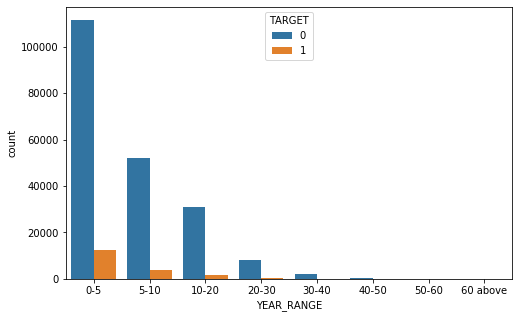

In [123]:
# checking if which Employement Range is impact more on between 'Defaulter' and 'NON-Defaulter'

plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['YEAR_RANGE'],hue=filter_application_df['TARGET'])
plt.show()

#### Insight

* Defaulter rate is maximum between the Employement Term of 0-5 year followed by 5-10 Employemet Term

In [124]:
#filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET'].count()

In [125]:
# Defaulter Rate among different YEAR of EMPLOYMENT RANGE

print('Defaulter rate among 0-5 EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                   .count()[1]/
                                                   (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                   .count()[1]+
                                                   filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                   .count()[0])*100))


print('Defaulter rate among 5-10 EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                    .count()[3]/
                                                    (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                    .count()[3]+
                                                    filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                    .count()[2])*100))

print('Defaulter rate among 10-20 EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[5]/
                                                     (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[5]+
                                                     filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[4])*100))

print('Defaulter rate among 20-30 EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[7]/
                                                     (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[7]+
                                                     filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[6])*100))

print('Defaulter rate among 30-40 EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[9]/
                                                     (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[9]+
                                                     filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[8])*100))

print('Defaulter rate among 40-50 EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[11]/
                                                     (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[11]+
                                                     filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                     .count()[10])*100))

print('Defaulter rate among 60 and above EMPLOYEMENT TERM',(filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                            .count()[13]/
                                                            (filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                            .count()[13]+
                                                            filter_application_df.groupby(by=['YEAR_RANGE','TARGET'])['TARGET']
                                                            .count()[12])*100))

Defaulter rate among 0-5 EMPLOYEMENT TERM 10.181199722719285
Defaulter rate among 5-10 EMPLOYEMENT TERM 7.037302725968436
Defaulter rate among 10-20 EMPLOYEMENT TERM 5.269475822586106
Defaulter rate among 20-30 EMPLOYEMENT TERM 4.580152671755725
Defaulter rate among 30-40 EMPLOYEMENT TERM 3.1302876480541455
Defaulter rate among 40-50 EMPLOYEMENT TERM 0.5780346820809248
Defaulter rate among 60 and above EMPLOYEMENT TERM nan


### Insights

* Defaulter rate is maximum in the Employement Term Range of 0-5 followed by 5-10 Term Range

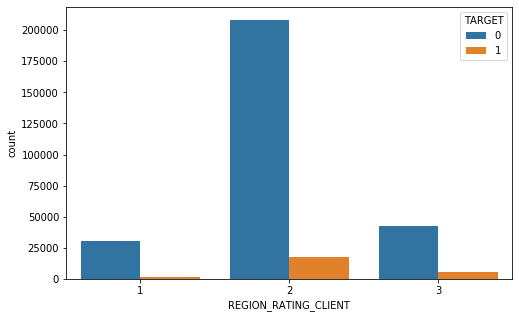

In [126]:
# checking if which client coming from which rating region 
plt.figure(figsize=(8,5))
sns.countplot(filter_application_df['REGION_RATING_CLIENT'],hue=filter_application_df['TARGET'])
plt.show()

In [127]:
filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET'].count()

REGION_RATING_CLIENT  TARGET
1                     0          30394
                      1           1549
2                     0         208198
                      1          17861
3                     0          42839
                      1           5358
Name: TARGET, dtype: int64

In [128]:
# Defaulter Rate between client owning CAR vs not

print('Defaulter rate Client coming from region Rated 1 = ',(filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                                          .count()[1][1]/
                                                             (filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                                          .count()[1][1]+
                                                             filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                                          .count()[1][0])*100))


print('Defaulter rate Client coming from region Rated 2 = ',(filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                              .count()[2][1]/
                                                             (filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                              .count()[2][1]+
                                                             filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                              .count()[2][0])*100))

print('Defaulter rate Client coming from region Rated 3 = ',(filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                              .count()[3][1]/
                                                             (filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                              .count()[3][1]+
                                                             filter_application_df.groupby(by=['REGION_RATING_CLIENT','TARGET'])['TARGET']
                                              .count()[3][0])*100))

Defaulter rate Client coming from region Rated 1 =  4.849262749272141
Defaulter rate Client coming from region Rated 2 =  7.9010346856351665
Defaulter rate Client coming from region Rated 3 =  11.116874494263127


#### Insights

* Client coming from the Rated 3 Region is more likely to default than others

## Seggregated Bi-Variate Analysis 

### Categorical-Numerical Bi-Variate/ Multi Variate Analysis

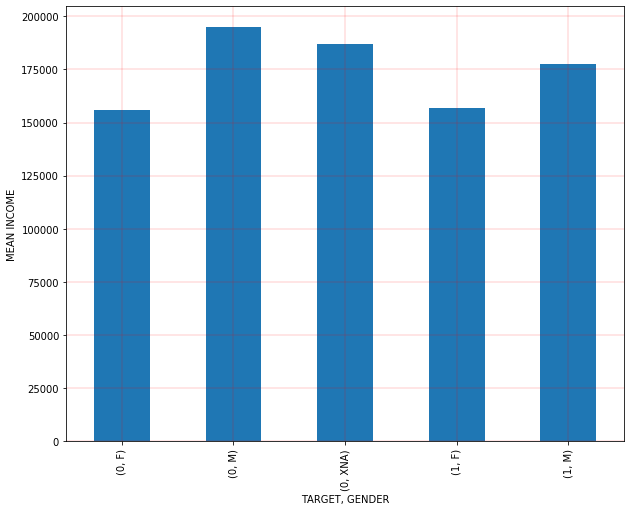

In [129]:
# CODE_GENDER VS AMT_INCOME_TOTAL based on Defaulter vs Non-Defaulter

plt.figure(figsize=[10,8])
filter_application_df.groupby(by=['TARGET', 'CODE_GENDER'])['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel('TARGET, GENDER')
plt.ylabel('MEAN INCOME')
plt.grid(color='r', linestyle='-', linewidth=0.2)
plt.show()

#### Insights:

* Average income of Non-Defaulter Male is comparative more than the average income of Defaulter Male
* Average income of Defaulter Female is comparative slightly more than the average income of Non-Defaulter Female


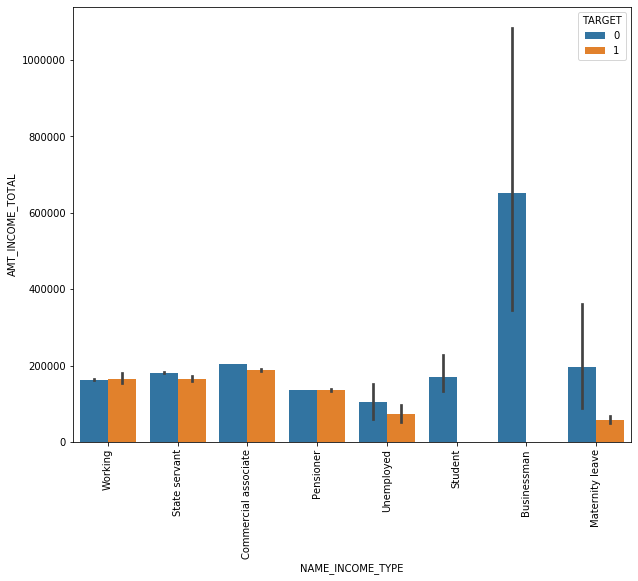

In [130]:
# NAME_INCOME_TYPE VS AMT_INCOME_TOTAL

plt.figure(figsize=[10,8])
sns.barplot(filter_application_df['NAME_INCOME_TYPE'], filter_application_df['AMT_INCOME_TOTAL'], hue=filter_application_df['TARGET'])
plt.xticks(rotation=90)
plt.show()

#### Insights

* Businessman Income type people are among the one who have maximum salary and less likely to default

* Businessman Income type people are the one having the huge outlier available



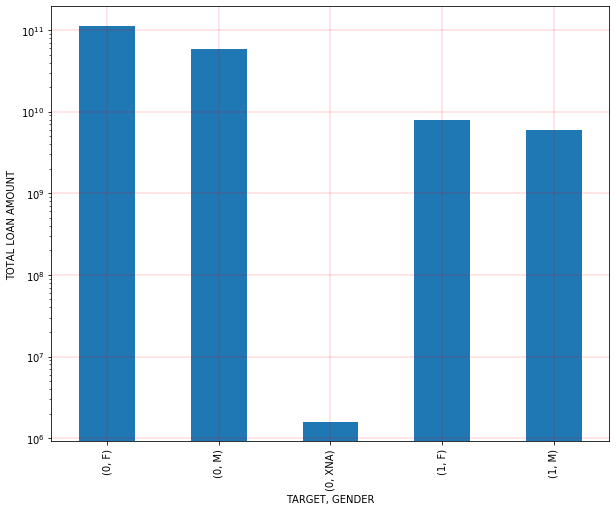

In [131]:
# CODE_GENDER VS AMT_CREDIT based on Defaulter vs Non-Defaulter

plt.figure(figsize=[10,8])
filter_application_df.groupby(by=['TARGET', 'CODE_GENDER'])['AMT_CREDIT'].sum().plot.bar()
plt.xlabel('TARGET, GENDER')
plt.ylabel('TOTAL LOAN AMOUNT')
plt.yscale('log')
plt.grid(color='r', linestyle='-', linewidth=0.2)
plt.show()

#### Insights

* Total Loan amount to the Non-Defaulter Female is comparative more than the loan amount to Defaulter Female

* Total Loan amount to the Non-Defaulter Male is comparative more than the loan amount to Defaulter Male

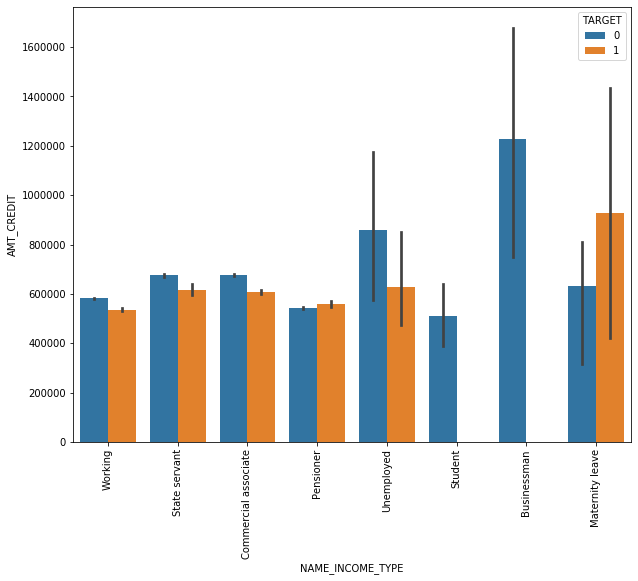

In [132]:
# NAME_INCOME_TYPE VS AMT_CREDIT

plt.figure(figsize=[10,8])
sns.barplot(filter_application_df['NAME_INCOME_TYPE'], filter_application_df['AMT_CREDIT'], hue=filter_application_df['TARGET'])
plt.xticks(rotation=90)
plt.show()

#### Insights

* Pensioner and the client on the Maternity leave are the one who defaulted on the more credit amount than they Repay.
So it will be risky to grant loan to these categories

### Numerical-Numerical Bi-Variate/ Multi Variate Analysis

In [133]:
# Splitting the application data based on the TARGET Variables

df_0 = filter_application_df[(filter_application_df['TARGET']==0)]
df_1 = filter_application_df[(filter_application_df['TARGET']==1)]

print(df_0.shape)
print(df_1.shape)

(281431, 50)
(24768, 50)


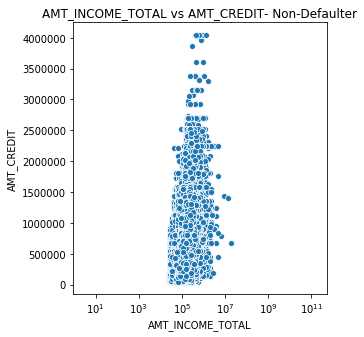

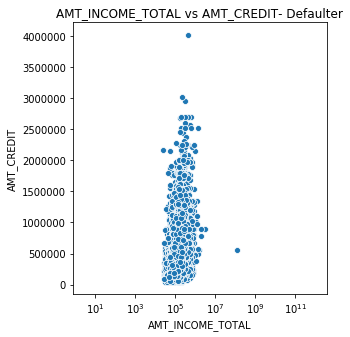

In [134]:
# Scatter plot between 'AMT_INCOME_TOTAL' vs 'AMT_CREDIT'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('AMT_INCOME_TOTAL vs AMT_CREDIT- Non-Defaulter')
plt.xscale('log')
sns.scatterplot(df_0['AMT_INCOME_TOTAL'], df_0['AMT_CREDIT'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('AMT_INCOME_TOTAL vs AMT_CREDIT- Defaulter')
plt.xscale('log')
sns.scatterplot(df_1['AMT_INCOME_TOTAL'], df_1['AMT_CREDIT'])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

#### insights

* We are not able to validate any linear relation between INCOME and Amount Credit in both Defaulter Vs Non-Defaulter Category

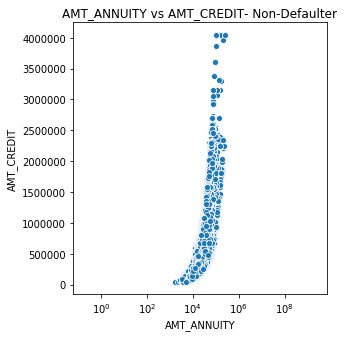

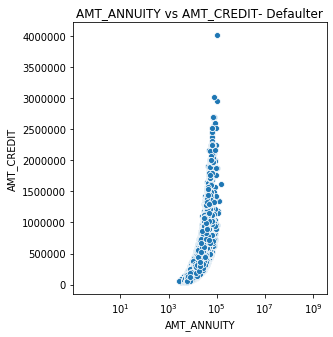

In [135]:
# Scatterplot between 'AMT_ANNUITY' vs 'AMT_CREDIT'

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('AMT_ANNUITY vs AMT_CREDIT- Non-Defaulter')
plt.xscale('log')
sns.scatterplot(df_0['AMT_ANNUITY'], df_0['AMT_CREDIT'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('AMT_ANNUITY vs AMT_CREDIT- Defaulter')
plt.xscale('log')
sns.scatterplot(df_1['AMT_ANNUITY'], df_1['AMT_CREDIT'])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

#### insights

* Distribution of AMT_CREDIT vs AMT_ANNUITY is almost same in Defaulter and Non_defaulter Data

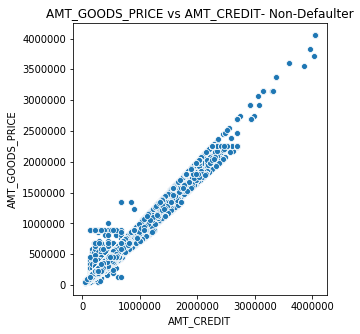

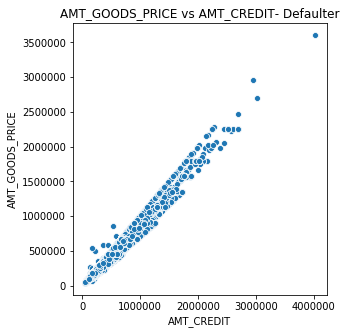

In [136]:
# Scatterplot AMT_CREDIT Vs AMT_GOODS_PRICE


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT- Non-Defaulter')
#plt.xscale('log')
sns.scatterplot(df_0['AMT_CREDIT'], df_0['AMT_GOODS_PRICE'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT- Defaulter')
#plt.xscale('log')
sns.scatterplot(df_1['AMT_CREDIT'], df_1['AMT_GOODS_PRICE'])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

##### Insights

* There is a positive linear relationship between 'AMT_GOODS_PRICE' and 'AMT_CREDIT'. Hence we can conclude a positive correlation  between these two variables in both Defaulter and Non-Defaulter datasets

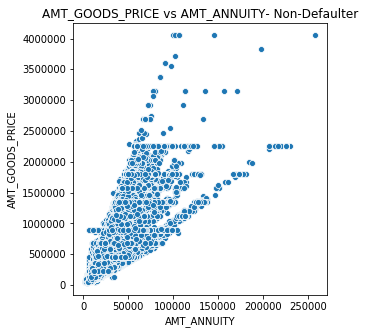

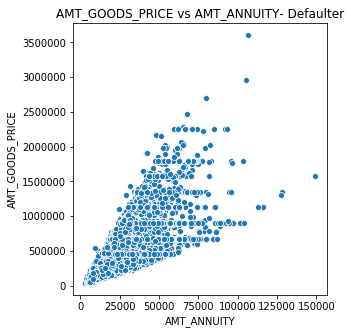

In [137]:
# Scatter plot AMT_GOODS_PRICE & AMT_ANNUITY


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY- Non-Defaulter')
#plt.xscale('log')
sns.scatterplot(df_0['AMT_ANNUITY'], df_0['AMT_GOODS_PRICE'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY- Defaulter')
#plt.xscale('log')
sns.scatterplot(df_1['AMT_ANNUITY'], df_1['AMT_GOODS_PRICE'])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

##### Insights

* There is a positive linear relationship between 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'. Hence we can conclude a positive correlation  between these two variables in both Defaulter and Non-Defaulter datasets

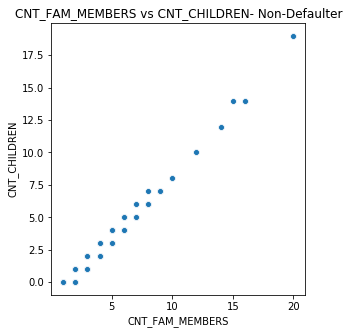

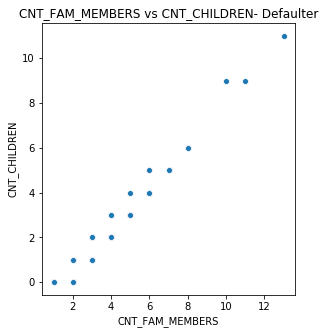

In [138]:
# Scatter plot CNT_FAM_MEMBERS & CNT_CHILDREN


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('CNT_FAM_MEMBERS vs CNT_CHILDREN- Non-Defaulter')
#plt.xscale('log')
sns.scatterplot(df_0['CNT_FAM_MEMBERS'], df_0['CNT_CHILDREN'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('CNT_FAM_MEMBERS vs CNT_CHILDREN- Defaulter')
#plt.xscale('log')
sns.scatterplot(df_1['CNT_FAM_MEMBERS'], df_1['CNT_CHILDREN'])
fig.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

##### Insights

* There is a positive linear relationship between 'CNT_FAM_MEMBERS' and 'CNT_CHILDREN'. Hence we can conclude a positive correlation  between these two variables in both Defaulter and Non-Defaulter datasets

## Seggregated Multi-Variate Analysis 

In [139]:
# Extracting the Numerical Variable for the Correlation Matrix

Num_col = filter_application_df.select_dtypes(include=['int64', 'float64']).columns
Num_col = Num_col.tolist()

In [140]:
# Removing 'SK_ID_CURR' and'TARGET' and 'AGE' and YEAR_EMPLOYED column from this col list
Num_col = Num_col[2:-2]

### Correlation in Non_defauter Datasets



In [141]:
## Correlation between the Numerical Columns in Non_Defaulter Datasets

Corr_df0 = df_0[Num_col].corr()
Corr_df0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.028207,0.003533,0.021642,-0.000213,-0.024078,-0.337535,-0.245328,-0.185975,0.028643,0.878636,0.022754,0.021736,-0.012358,0.010768,0.017220,0.021589,0.072179,0.071003,0.014483,-0.002244,0.014149,-0.002131,0.008140,0.056041,-0.000312,0.000621,-0.001628,-0.010520,-0.007020,-0.042566
AMT_INCOME_TOTAL,0.028207,1.000000,0.342316,0.418157,0.348788,0.166083,-0.063516,-0.141480,-0.065203,-0.023444,0.034758,-0.185637,-0.199647,0.068641,0.137108,0.127461,0.011085,0.018512,0.021499,-0.027860,-0.027564,-0.027724,-0.027547,0.042653,-0.037354,0.001144,0.007976,0.006513,0.061935,0.013297,0.030729
AMT_CREDIT,0.003533,0.342316,1.000000,0.770330,0.987249,0.100663,0.046783,-0.070899,-0.013498,0.001057,0.064850,-0.103399,-0.112326,0.024431,0.053817,0.054446,-0.024960,-0.015522,0.002731,-0.000956,-0.019845,-0.000935,-0.022210,0.069927,0.098579,-0.003685,0.004316,-0.001927,0.054127,0.017656,-0.048914
AMT_ANNUITY,0.021642,0.418157,0.770330,1.000000,0.775812,0.120856,-0.013283,-0.106164,-0.039577,-0.014677,0.076344,-0.132101,-0.145195,0.041823,0.080902,0.075806,-0.005453,0.001928,0.010987,-0.013141,-0.022518,-0.012943,-0.023357,0.062671,0.102133,0.003232,0.002309,0.012734,0.038176,0.011136,-0.010584
AMT_GOODS_PRICE,-0.000213,0.348788,0.987249,0.775812,1.000000,0.103743,0.044334,-0.069183,-0.015908,0.003362,0.063056,-0.104240,-0.112506,0.026552,0.054936,0.054491,-0.024816,-0.016592,0.001479,-0.000710,-0.021027,-0.000726,-0.023173,0.071905,0.078751,-0.003075,0.004792,-0.001556,0.056004,0.018105,-0.051015
REGION_POPULATION_RELATIVE,-0.024078,0.166083,0.100663,0.120856,0.103743,1.000000,0.025289,-0.007377,0.052287,0.000872,-0.023092,-0.538114,-0.536380,0.004488,0.059815,0.083764,-0.047916,-0.040971,-0.013015,-0.012184,0.005934,-0.011666,0.002267,0.042099,-0.084369,-0.002268,0.002060,-0.002463,0.078591,-0.000587,0.002153
DAYS_BIRTH,-0.337535,-0.063516,0.046783,-0.013283,0.044334,0.025289,1.000000,0.626479,0.333538,0.271001,-0.286615,-0.002331,-0.000704,-0.066405,-0.097977,-0.071538,-0.179845,-0.241981,-0.160045,-0.007706,0.003086,-0.007294,0.001069,0.076205,-0.106354,-0.004305,-0.002776,0.001130,-0.003152,0.011175,0.072573
DAYS_EMPLOYED,-0.245328,-0.141480,-0.070899,-0.106164,-0.069183,-0.007377,0.626479,1.000000,0.214824,0.276715,-0.238615,0.038526,0.040686,-0.037690,-0.111013,-0.098860,-0.092974,-0.258347,-0.221572,0.007269,0.019386,0.007451,0.016410,-0.023744,-0.246750,-0.004439,-0.000892,0.002299,-0.035031,0.015091,0.051899
DAYS_REGISTRATION,-0.185975,-0.065203,-0.013498,-0.039577,-0.015908,0.052287,0.333538,0.214824,1.000000,0.100349,-0.175745,-0.075872,-0.069334,-0.028916,-0.037743,-0.028246,-0.064425,-0.099109,-0.072328,-0.008287,-0.001200,-0.008217,-0.002637,0.053565,-0.031735,0.002985,0.000080,0.001271,0.011825,0.000390,0.026314
DAYS_ID_PUBLISH,0.028643,-0.023444,0.001057,-0.014677,0.003362,0.000872,0.271001,0.276715,0.100349,1.000000,0.020106,0.008989,0.011743,-0.034925,-0.049297,-0.035133,-0.075108,-0.099705,-0.062309,0.012426,-0.000335,0.012910,-0.002408,0.082782,-0.050653,-0.004837,0.000172,0.001640,0.008437,0.007133,0.035420


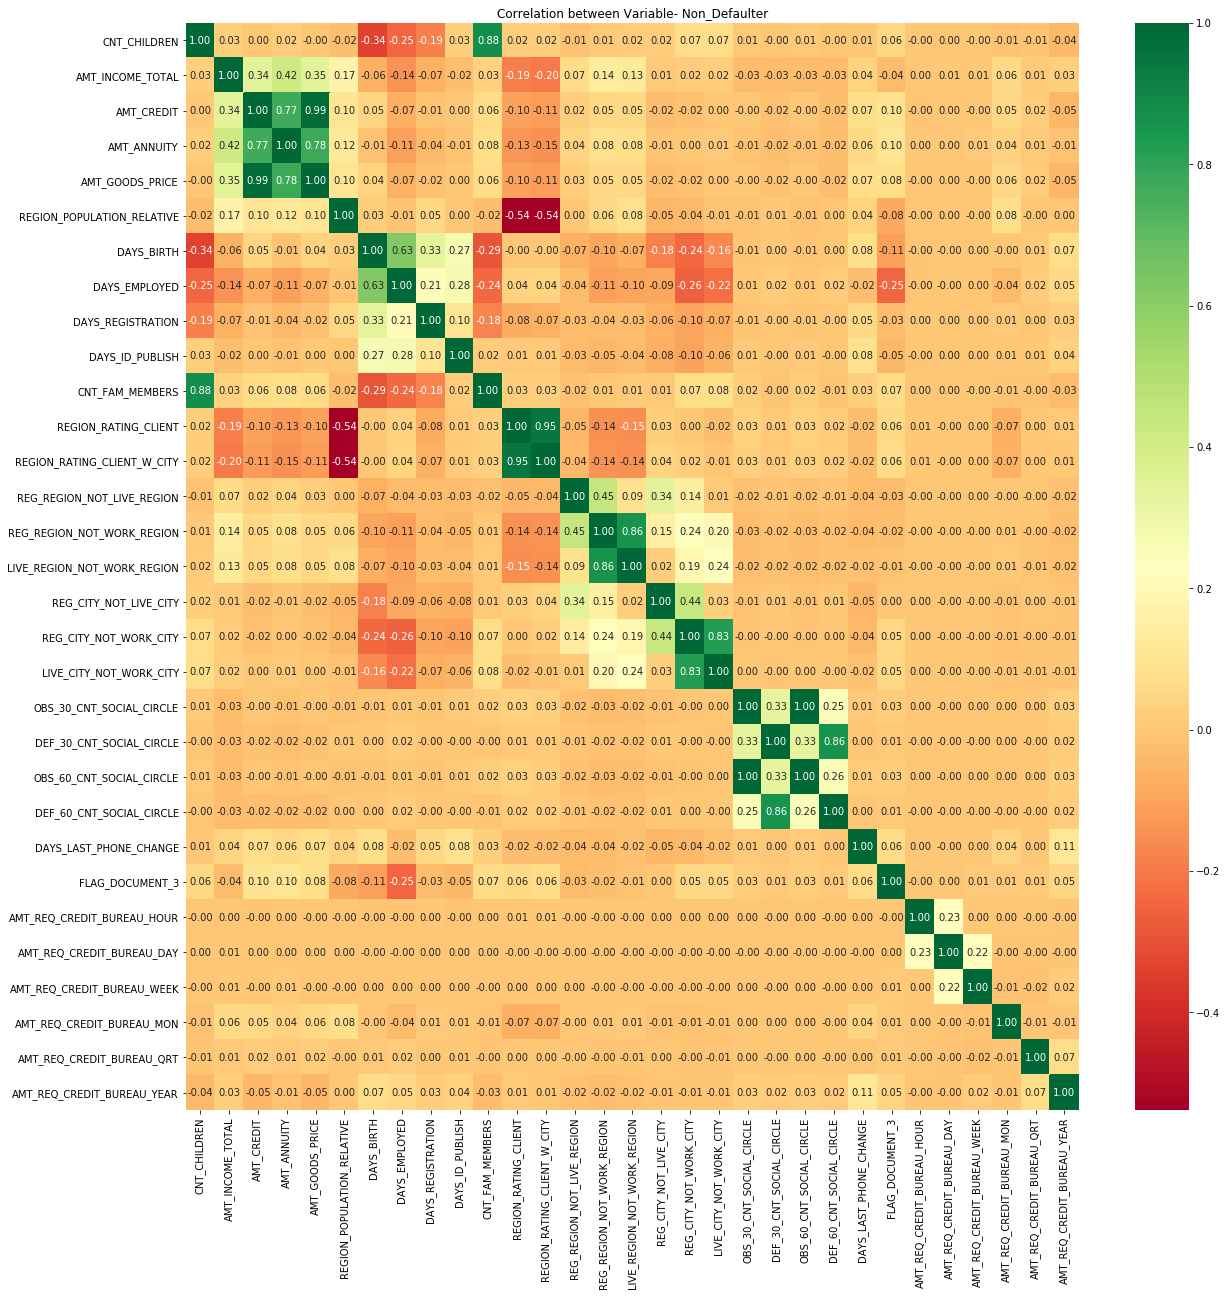

In [142]:
# Heatmap for the Correlation Matrix of Non_defaulter data

plt.figure(figsize=[20,20])
plt.title('Correlation between Variable- Non_Defaulter')
sns.heatmap(Corr_df0, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

In [143]:
# Top 10 Correlation in Non_defaulter database

top_10_df0 =Corr_df0.unstack()

top_10_df0 = top_10_df0.sort_values(kind = 'quicksort')

top_10_df0 =pd.DataFrame(top_10_df0)

In [144]:
# Renaming the column and reseting the Index

top_10_df0.reset_index(inplace=True)

top_10_df0.rename(columns={0:'Value'}, inplace=True)
top_10_df0.head()

,level_0,level_1,Value
0,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,-0.538114
1,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.538114
2,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,-0.536380
3,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.536380
4,CNT_CHILDREN,DAYS_BIRTH,-0.337535


#### Insights

* Here the highest negative Correlation in Non_defaulter data is -0.54 between 'REGION_RATING_CLIENT' & 'REGION_POPULATION_RELATIVE'

* So we this dataset does'not have any strong negative Correlation between the variables





#### Finding the top Positive Correlation in the datasets for Non_defaulter



In [145]:
# Extracting only those columns where correlation value is more than .6

top_10_non_def =  top_10_df0[(top_10_df0['Value']>0.6)& (top_10_df0['level_0']!=top_10_df0['level_1'])]
top_10_non_def.sort_values(by='Value', ascending=False, inplace= True)
top_10_non_def.head()

,level_0,level_1,Value
929,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998508
928,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
927,AMT_CREDIT,AMT_GOODS_PRICE,0.987249
926,AMT_GOODS_PRICE,AMT_CREDIT,0.987249
925,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.949995


* Here we are getting same combination of columns two times. So dropping one combination 

### Top 10 correlation in Non_defaulter datasets

In [146]:
# Top 10 correlation in Non_defaulter datasets
top_10_non_def.drop_duplicates('Value', keep='first', inplace=True, ignore_index=True)
top_10_non_def

,level_0,level_1,Value
0,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998508
1,AMT_CREDIT,AMT_GOODS_PRICE,0.987249
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.949995
3,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878636
4,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861472
5,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859316
6,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830428
7,AMT_ANNUITY,AMT_GOODS_PRICE,0.775812
8,AMT_ANNUITY,AMT_CREDIT,0.770330
9,DAYS_BIRTH,DAYS_EMPLOYED,0.626479


### Inferences:

* client's social surroundings with observable in Past 60 days is highly correlated with client's social surroundings with observable in Past 30 days for Non-Defaulter

* AMT_GOODS_PRICE is hightly correlated with the Loan Amount. Means if the Amount of Good price is highly correlated with the Loan amount for a client, then it is less likely to default


### Correlation in Defaulter datasets

In [147]:
## Correlation between the Numerical Columns in Defaulter Datasets

Corr_df1 = df_1[Num_col].corr()
Corr_df1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004777,-0.001960,0.030960,-0.008480,-0.032008,-0.259213,-0.192843,-0.149190,0.032368,0.885558,0.041147,0.043615,-0.024205,-0.020654,-0.011887,-0.000861,0.045898,0.053077,0.025742,0.001639,0.025116,-0.004944,-0.011521,0.060457,-0.000048,-0.013034,-0.011706,-0.013271,-0.018431,-0.035157
AMT_INCOME_TOTAL,0.004777,1.000000,0.038043,0.046334,0.037548,0.009126,-0.003118,-0.014959,-0.000151,0.004195,0.006649,-0.021496,-0.022807,0.007593,0.014530,0.013416,-0.002224,-0.002996,-0.001328,-0.004711,-0.005170,-0.004619,-0.004848,0.002405,0.001276,0.000644,-0.000279,0.000005,0.004038,-0.001160,0.001721
AMT_CREDIT,-0.001960,0.038043,1.000000,0.751619,0.983097,0.069095,0.135498,0.002212,0.025937,0.052010,0.051065,-0.059384,-0.071591,0.019534,0.033126,0.033533,-0.033209,-0.037765,-0.016529,0.019236,-0.025793,0.019579,-0.030643,0.111357,0.058539,-0.005508,0.002874,0.007602,0.054742,-0.017763,-0.036008
AMT_ANNUITY,0.030960,0.046334,0.751619,1.000000,0.752442,0.071620,0.014133,-0.081103,-0.034357,0.016255,0.075564,-0.074047,-0.089593,0.034837,0.066481,0.064164,-0.005891,0.002063,0.009958,0.004618,-0.022139,0.005602,-0.027172,0.080394,0.101142,0.014752,-0.000465,0.031240,0.052983,-0.010572,-0.014142
AMT_GOODS_PRICE,-0.008480,0.037548,0.983097,0.752442,1.000000,0.076093,0.135929,0.006951,0.025806,0.055842,0.047108,-0.066440,-0.077278,0.022460,0.036295,0.035593,-0.034107,-0.039087,-0.016920,0.019921,-0.021783,0.020385,-0.026179,0.118502,0.036489,-0.004009,0.004205,0.008039,0.058235,-0.016284,-0.037963
REGION_POPULATION_RELATIVE,-0.032008,0.009126,0.069095,0.071620,0.076093,1.000000,0.048397,0.015437,0.056537,0.016044,-0.030215,-0.443571,-0.447275,-0.021997,0.022220,0.046067,-0.059866,-0.052602,-0.020530,0.006416,0.025863,0.006961,0.018341,0.055082,-0.042575,-0.001233,-0.005494,0.002645,0.071101,-0.007446,0.000292
DAYS_BIRTH,-0.259213,-0.003118,0.135498,0.014133,0.135929,0.048397,1.000000,0.582802,0.288753,0.252430,-0.203428,-0.034110,-0.033717,-0.055357,-0.070394,-0.046402,-0.161900,-0.215489,-0.124097,0.005714,-0.004298,0.005878,-0.003374,0.110785,-0.129243,-0.014130,0.007241,0.005832,0.005946,0.017175,0.083710
DAYS_EMPLOYED,-0.192843,-0.014959,0.002212,-0.081103,0.006951,0.015437,0.582802,1.000000,0.192529,0.229072,-0.186397,0.003729,0.003087,-0.034969,-0.091153,-0.078774,-0.088054,-0.245764,-0.198426,-0.008038,0.003349,-0.008348,0.005556,0.000856,-0.272852,-0.007736,0.021541,0.015061,-0.024937,0.014662,0.035649
DAYS_REGISTRATION,-0.149190,-0.000151,0.025937,-0.034357,0.025806,0.056537,0.288753,0.192529,1.000000,0.096703,-0.145772,-0.103790,-0.100308,-0.020848,-0.021926,-0.016391,-0.048809,-0.088282,-0.062418,-0.014143,-0.010240,-0.014587,-0.009048,0.071731,-0.037773,0.004904,0.008358,-0.002986,-0.004523,0.012558,0.013580
DAYS_ID_PUBLISH,0.032368,0.004195,0.052010,0.016255,0.055842,0.016044,0.252430,0.229072,0.096703,1.000000,0.031607,-0.002011,0.000850,-0.033343,-0.033527,-0.020859,-0.067716,-0.070249,-0.031421,0.020012,-0.007071,0.019643,-0.004451,0.123846,-0.027404,-0.003931,0.012646,-0.002961,0.014719,-0.007962,0.041524


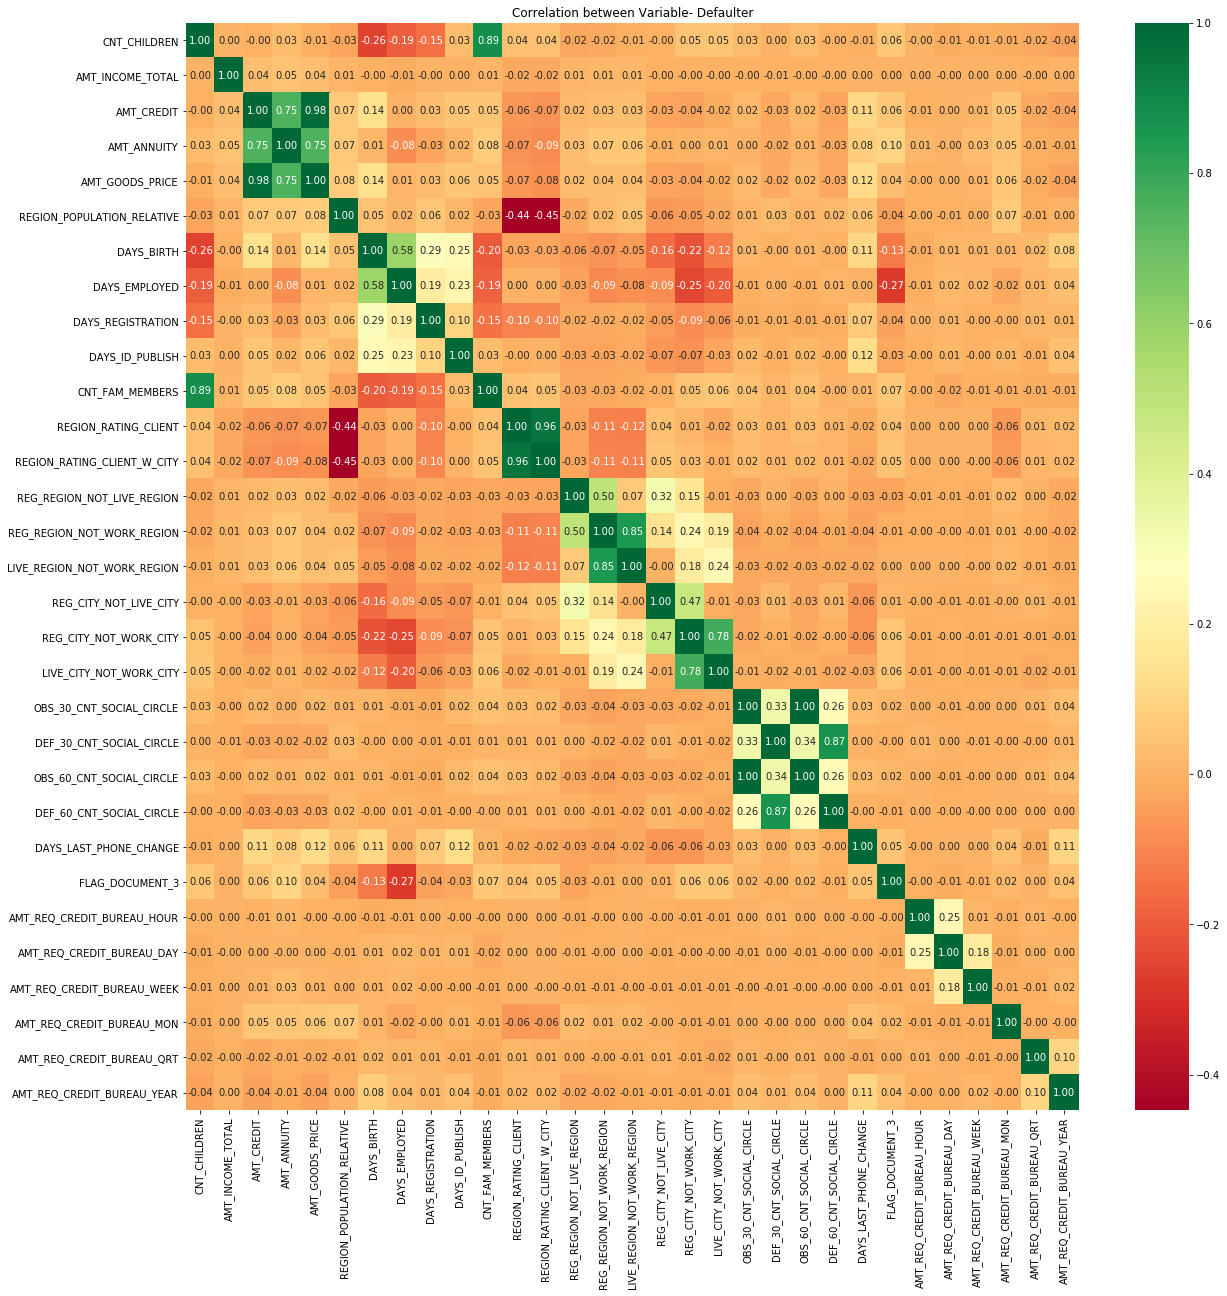

In [148]:
# Heatmap for the Correlation Matrix of Defaulter data

plt.figure(figsize=[20,20])
plt.title('Correlation between Variable- Defaulter')
sns.heatmap(Corr_df1, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

In [149]:
# Top 10 Correlation in Defaulter database

top_10_df1 =Corr_df1.unstack()

top_10_df1 = top_10_df1.sort_values(kind = 'quicksort')

top_10_df1 =pd.DataFrame(top_10_df1)

In [150]:
# Renaming the column and reseting the Index

top_10_df1.reset_index(inplace=True)

top_10_df1.rename(columns={0:'Value'}, inplace=True)
top_10_df1.head()

,level_0,level_1,Value
0,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.447275
1,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,-0.447275
2,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.443571
3,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,-0.443571
4,FLAG_DOCUMENT_3,DAYS_EMPLOYED,-0.272852


#### Insights

* Here the highest negative Correlation in Non_defaulter data is -0.45 between 'REGION_RATING_CLIENT_W_CITY' & 'REGION_POPULATION_RELATIVE'

* So we this dataset does'not have any strong negative Correlation between the variables



#### Finding the top Positive correlation in the datasets for Non_defaulter

In [151]:
# Extracting only those columns where correlation value is more than 0.5

top_10_Def =  top_10_df1[(top_10_df1['Value']>0.5)& (top_10_df1['level_0']!=top_10_df1['level_1'])]
top_10_Def.sort_values(by='Value', ascending=False, inplace= True)
top_10_Def.head()

,level_0,level_1,Value
929,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998286
928,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998286
927,AMT_GOODS_PRICE,AMT_CREDIT,0.983097
926,AMT_CREDIT,AMT_GOODS_PRICE,0.983097
925,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956643


* Here we are getting same combination of columns two times. So dropping one combination 

### Top 10 correlation in Defaulter datasets

In [152]:
# Top 10 correlation in Defaulter datasets
top_10_Def.drop_duplicates('Value', keep='first', inplace=True, ignore_index=True)
top_10_Def

,level_0,level_1,Value
0,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998286
1,AMT_GOODS_PRICE,AMT_CREDIT,0.983097
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956643
3,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885558
4,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868807
5,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.847643
6,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778433
7,AMT_ANNUITY,AMT_GOODS_PRICE,0.752442
8,AMT_CREDIT,AMT_ANNUITY,0.751619
9,DAYS_EMPLOYED,DAYS_BIRTH,0.582802


### Inferences 

* Credit amount is highly correlated with amount of goods price which is same as Non_Defaulter.

* Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)

* There is slight increase in the correlation between CNT_CHILDREN & CNT_FAM_MEMBERS in Defaulter(0.88) vs in Non_Defaulter (0.87)



### Merging Datasets - Application and Previous Application

In [153]:
# Merging the Application Datasets with previous application datasets

final_df  = filter_application_df.merge(filter_prevapp_df, how='inner', on='SK_ID_CURR')
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_RANGE,YEAR_EMPLOYED,YEAR_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0-1M,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,1M and above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,1M and above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,1M and above,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1M,100k-200k,52,50-60,0,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [154]:
# Checking the shape
final_df.shape

(1409254, 71)

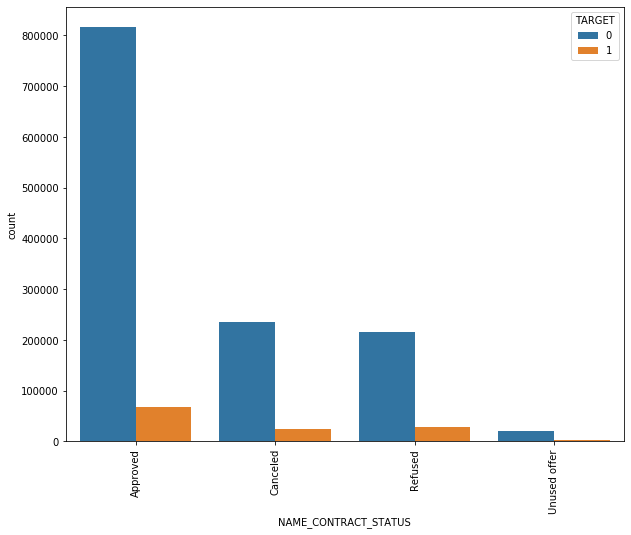

In [155]:
# plotting NAME_CONTRACT_STATUS VS TARGET 

plt.figure(figsize=[10,8])
sns.countplot(final_df['NAME_CONTRACT_STATUS'], hue=final_df['TARGET'])
plt.xticks(rotation=90)
plt.show()

In [156]:
# Repayable Rate between client owning House vs not

print('Rate of Repayment which previously Approved',(final_df
                                                   .groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET']
                                                   .count()[0]/(final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET']
                                                                .count()[0]+final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].count()[1])*100))


print('Rate of Repayment which previously Canceled',(final_df.
                                              groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].
                                              count()[2]/(final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET']
                                                          .count()[2]+final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].count()[3])*100))

print('Rate of Repayment which previously Refused',(final_df.
                                              groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].
                                              count()[4]/(final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET']
                                                          .count()[4]+final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].count()[5])*100))

print('Rate of Repayment which previously Unused Offer',(final_df.
                                              groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].
                                              count()[6]/(final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET']
                                                          .count()[6]+final_df.groupby(by=['NAME_CONTRACT_STATUS','TARGET'])['TARGET'].count()[7])*100))

Rate of Repayment which previously Approved 92.40187615264175
Rate of Repayment which previously Canceled 90.81641331745712
Rate of Repayment which previously Refused 88.00313996132287
Rate of Repayment which previously Unused Offer 91.73127753303964


### Inferences

* So basis of the above stats, there are only 8% people who got approval last time and get defaulted 
* There are 90% repayment rate in the Previously canceled application. As this rate is pretty much good. So we can  look into this by reducing the intrest rate or any other mode
* 88% of the client who has refused earlier has repayed loan in current case



## Observations:

### Repayers Attributes (TARGET = 0)

* CODE_GENDER:Female is less likely to Default
* FLAG_OWN_CAR: Client who owned car are less likely to default
* FLAG_OWN_REALTY: Client owning house are less likely to default
* DAYS_BIRTH: Client having age more than 50 have low chances of Default
* DAYS_EMPLOYED: Clients having employement more than 40 years have very less chances of Default
* REGION_RATING_CLIENT: Client coming from the Rated 1 region have less chances to default
* NAME_INCOME_TYPE: Businessman and Students have no defaults cases


### Defaulters Attributes (TARGET = 1)

* CODE_GENDER:MALE are more likely to Default
* FLAG_OWN_CAR: Client who dont owned car are more likely to default
* FLAG_OWN_REALTY: Client dont own house are more likely to default
* DAYS_BIRTH: Client having in age range of between 20-30 have higher default rate i.e. 11%
* DAYS_EMPLOYED: Clients having employement less than 5 years have very high chances of Default
* REGION_RATING_CLIENT: Client coming from the Rated 3 region have high chances to default


## Other Observations/Suggestions:

* We cannot able to conclude any insights from the correlation among the variables in the data. As the top correlated varibale are somehow same in the both Defaulter and Non-Defaulter case

* Data is highly inclined towards the Non-Defaulters. Means more than 90% of the data depicts the attributes of the Non-Defaulters clients and might required more instances for the Defaulter in order to catch the real inferences.

* There are 90% repayment rate in the Previously canceled application. As this rate is pretty much good. So we can look into this and try to find out how to reduce the cancelation of these client's loan applications

* There are around 8% people who previously got approval for the loan and got defaulted in current case. We should separately analye these client and try to find if there is any insight/trend hidden in their data
